In [1]:
from veneer import _rotare_img,crop_ve
from veneer import Veneer
import cv2
import matplotlib.pyplot as plt

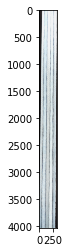

In [2]:
img = cv2.imread(r'D:\Projects\CVVeneer\data\5\IMG_2039.jpeg')
cat=crop_ve(img)
plt.imshow(cat)

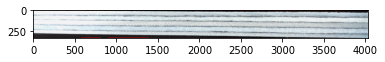

In [3]:
newimg=_rotare_img(cat)
plt.imshow(newimg)

In [4]:
v1=Veneer(r'D:\Projects\CVVeneer\data\5\IMG_2039.jpeg')

5.0


d:\projects\cvveneer\venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
d:\projects\cvveneer\venv\lib\site-packages\pywt\_multilevel.py:45: UserWarning: Level value of 15 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


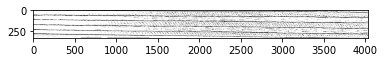

In [5]:
res=v1.conv_an()
print(res)
bw=v1.filt_img()
plt.imshow(bw,cmap='Greys')

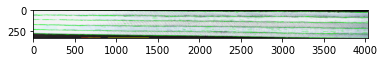

In [6]:
lineimg,lines=v1.edge_detector(bw,minLineLength=100,maxLineGap=20)
plt.imshow(lineimg,cmap='Greys')

5.0


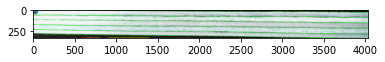

In [7]:
ans,img,fe,figg=v1.count_veneer(lines,minLineLength=100,maxLineGap=20)
plt.imshow(img)

print(ans)

In [8]:
v1=Veneer(r'D:\Projects\CVVeneer\data\5\IMG_2040.jpeg')

In [9]:
res=v1.conv_an()
print(res)

5.0


d:\projects\cvveneer\venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


In [7]:
import glob

In [8]:
imgs=glob.glob('D:\Projects\CVVeneer\data\*\*.jpeg')
print(imgs)

['D:\\Projects\\CVVeneer\\data\\11\\IMG_1890.jpeg', 'D:\\Projects\\CVVeneer\\data\\11\\IMG_1891.jpeg', 'D:\\Projects\\CVVeneer\\data\\11\\IMG_1892.jpeg', 'D:\\Projects\\CVVeneer\\data\\11\\IMG_1893.jpeg', 'D:\\Projects\\CVVeneer\\data\\11\\IMG_1894.jpeg', 'D:\\Projects\\CVVeneer\\data\\11\\IMG_1895.jpeg', 'D:\\Projects\\CVVeneer\\data\\11\\IMG_1896.jpeg', 'D:\\Projects\\CVVeneer\\data\\11\\IMG_1897.jpeg', 'D:\\Projects\\CVVeneer\\data\\11\\IMG_1898.jpeg', 'D:\\Projects\\CVVeneer\\data\\11\\IMG_1899.jpeg', 'D:\\Projects\\CVVeneer\\data\\11\\IMG_1900.jpeg', 'D:\\Projects\\CVVeneer\\data\\11\\IMG_1901.jpeg', 'D:\\Projects\\CVVeneer\\data\\11\\IMG_1902.jpeg', 'D:\\Projects\\CVVeneer\\data\\11\\IMG_1903.jpeg', 'D:\\Projects\\CVVeneer\\data\\11\\IMG_1904.jpeg', 'D:\\Projects\\CVVeneer\\data\\11\\IMG_1905.jpeg', 'D:\\Projects\\CVVeneer\\data\\11\\IMG_1906.jpeg', 'D:\\Projects\\CVVeneer\\data\\11\\IMG_1907.jpeg', 'D:\\Projects\\CVVeneer\\data\\11\\IMG_1908.jpeg', 'D:\\Projects\\CVVeneer\\data\

In [9]:
from pathlib import Path
path=Path(imgs[0])
parts=path.parts
print(parts[-2])
partscount=parts[-2]
print(partscount.split('_')[0])

11
11


In [10]:
import pandas as pd
from tqdm import tqdm
import random
import numpy as np

  0%|          | 0/609 [00:00<?, ?it/s]d:\projects\cvveneer\venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
d:\projects\cvveneer\venv\lib\site-packages\pywt\_multilevel.py:45: UserWarning: Level value of 15 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))
  0%|          | 1/609 [00:13<2:14:00, 13.22s/it]d:\projects\cvveneer\venv\lib\site-packages\pywt\_multilevel.py:45: UserWarning: Level value of 15 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))
  0%|          | 2/609 [00:20<1:37:08,  9.60s/it]d:\projects\cvveneer\venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
d:\projects\cvveneer\venv\lib\site-packages\pywt\_multilevel.py:45: UserWarning: 

D:\Projects\CVVeneer\data\29_2\IMG_2188.jpeg  error  object of type 'NoneType' has no len()
D:\Projects\CVVeneer\data\21_2\IMG_2228.jpeg  error  object of type 'NoneType' has no len()
D:\Projects\CVVeneer\data\11_1\IMG_2420.jpeg  error  object of type 'NoneType' has no len()
D:\Projects\CVVeneer\data\9_1\IMG_2300.jpeg  error  object of type 'NoneType' has no len()
D:\Projects\CVVeneer\data\25_1\IMG_2155.jpeg  error  object of type 'NoneType' has no len()
D:\Projects\CVVeneer\data\17_1\IMG_2378.jpeg  error  object of type 'NoneType' has no len()
D:\Projects\CVVeneer\data\7_1\IMG_2428.jpeg  error  object of type 'NoneType' has no len()
D:\Projects\CVVeneer\data\25_3\IMG_2494.jpeg  error  object of type 'NoneType' has no len()
D:\Projects\CVVeneer\data\21_1\IMG_2178.jpeg  error  object of type 'NoneType' has no len()
D:\Projects\CVVeneer\data\11_1\IMG_2410.jpeg  error  object of type 'NoneType' has no len()
D:\Projects\CVVeneer\data\11_1\IMG_2409.jpeg  error  object of type 'NoneType' has

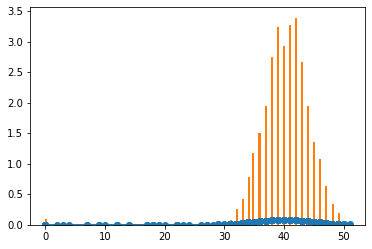

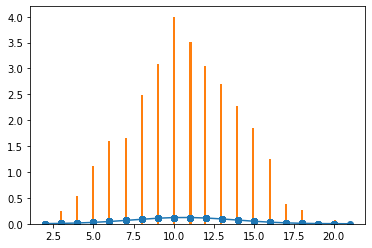

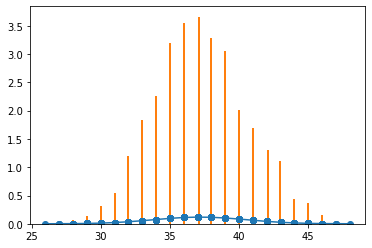

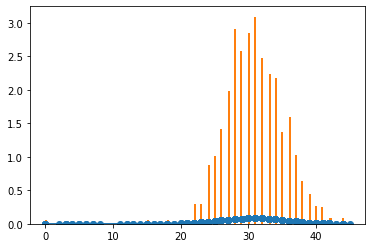

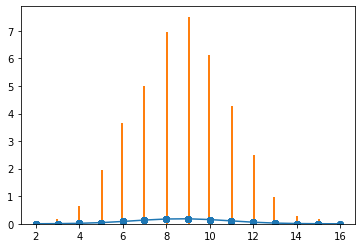

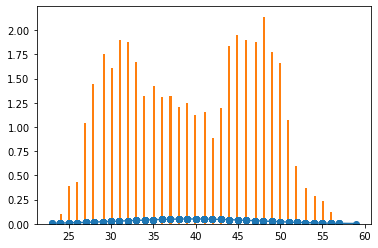

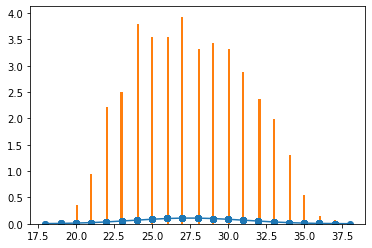

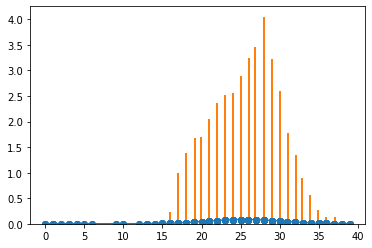

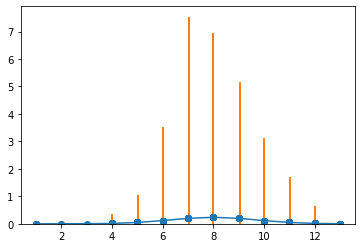

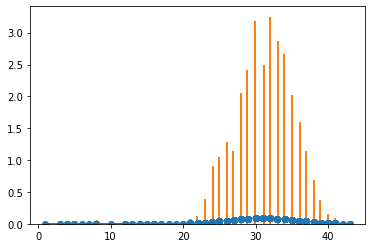

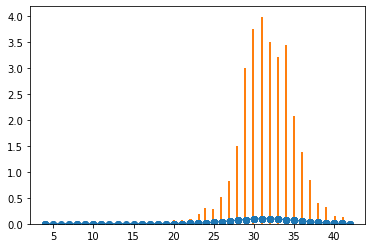

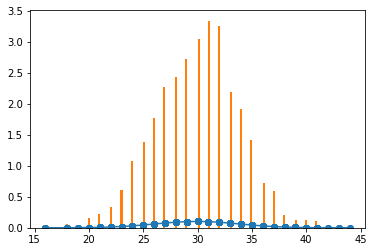

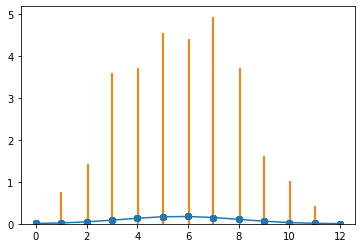

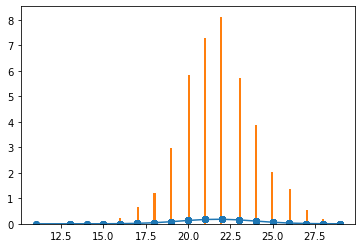

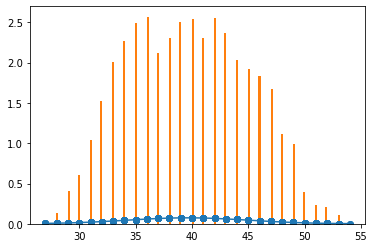

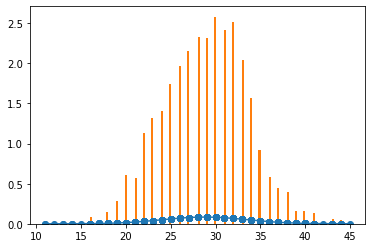

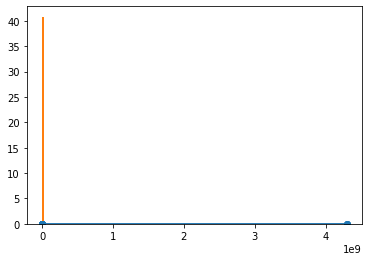

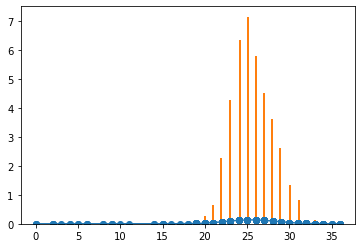

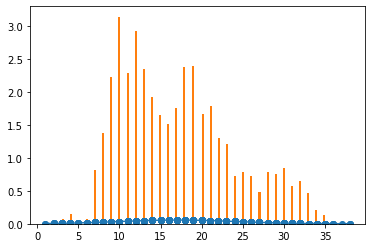

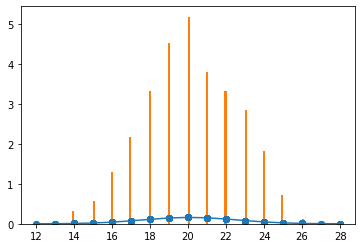

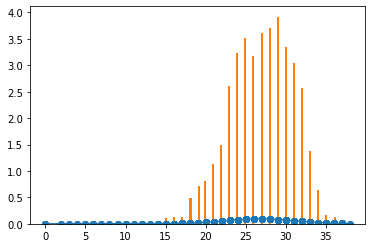

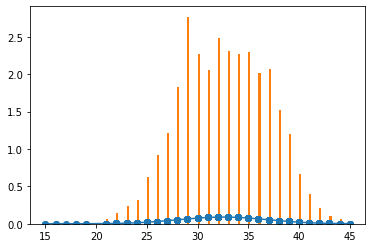

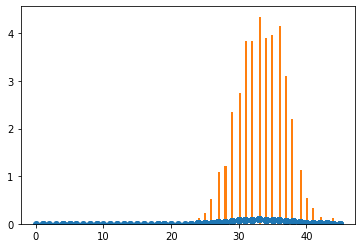

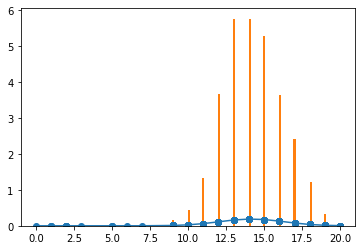

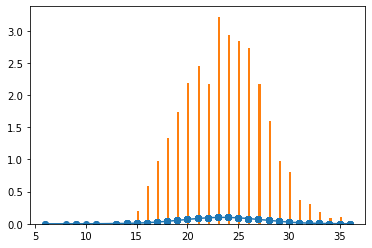

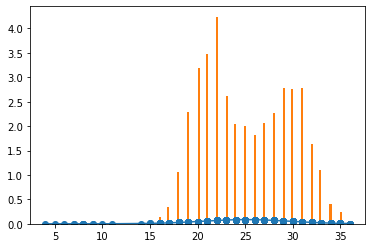

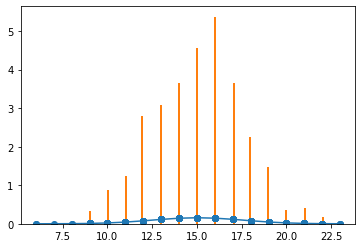

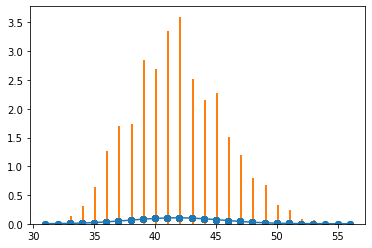

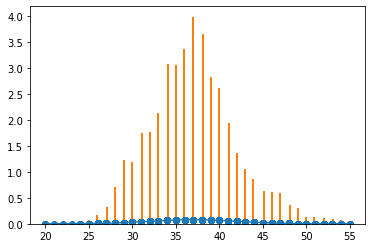

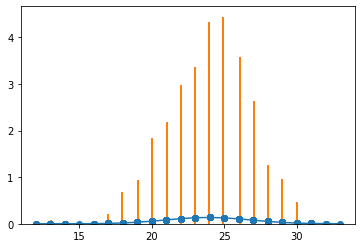

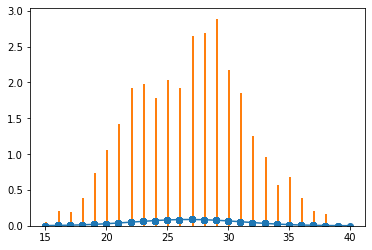

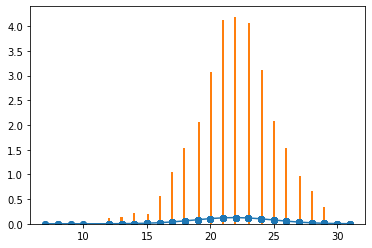

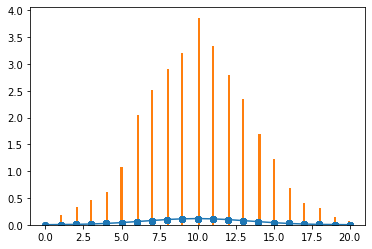

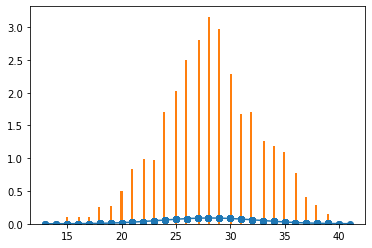

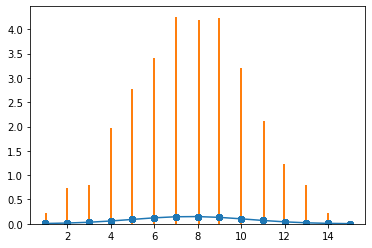

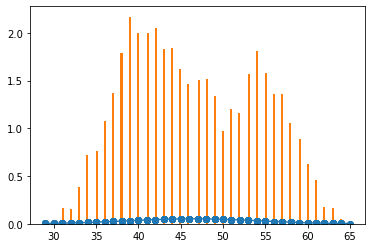

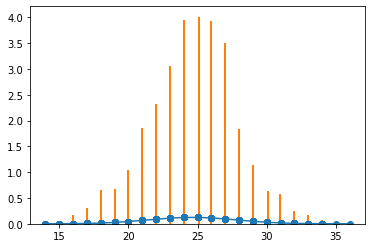

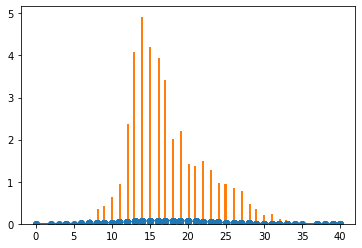

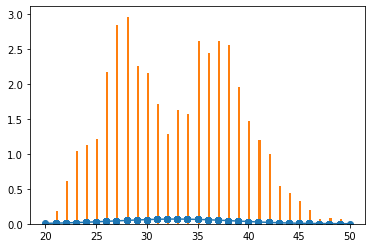

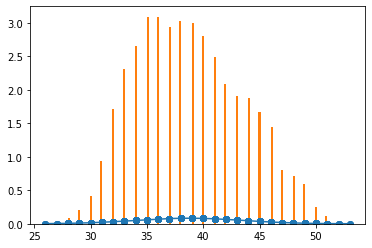

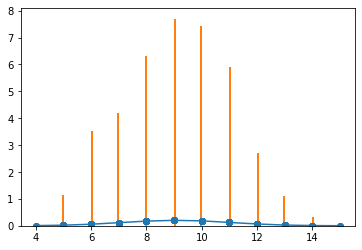

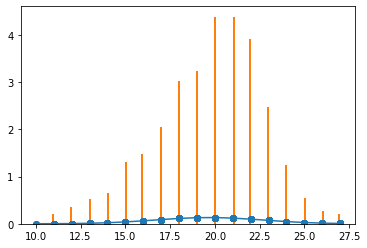

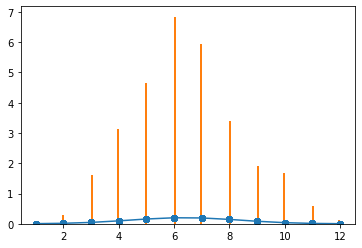

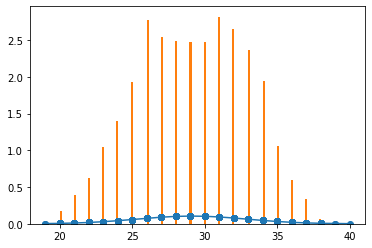

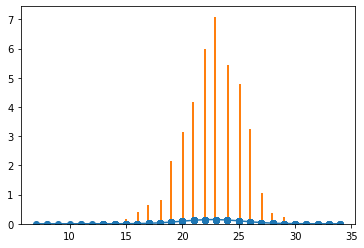

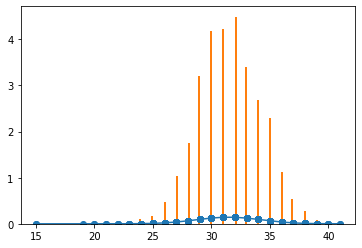

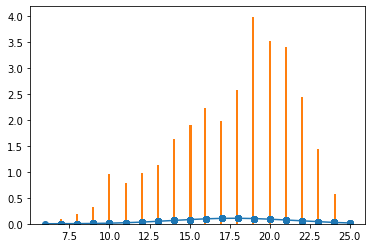

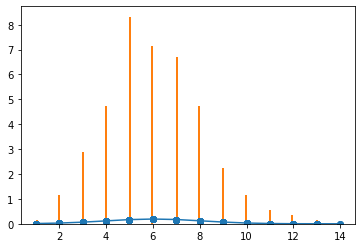

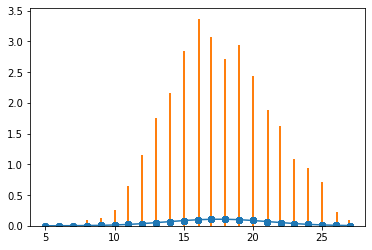

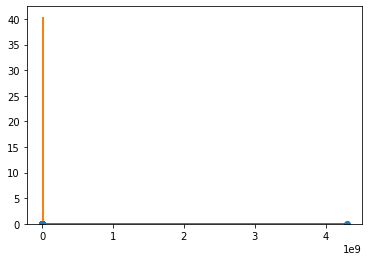

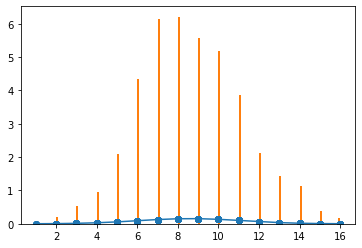

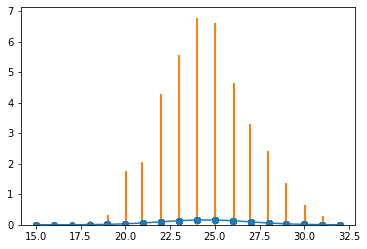

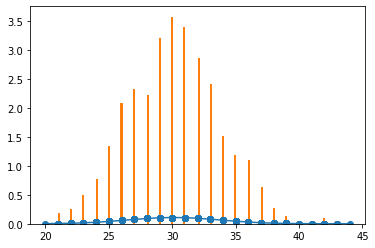

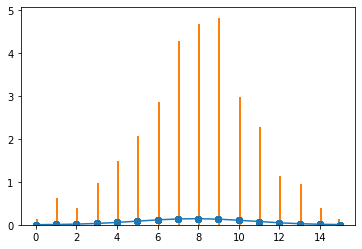

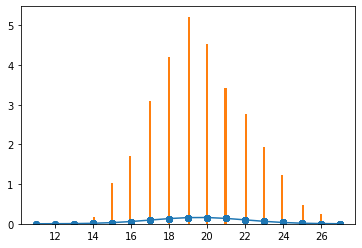

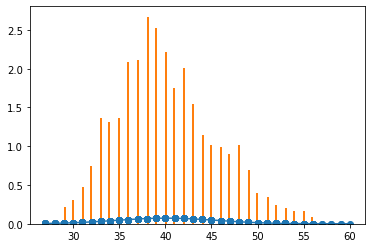

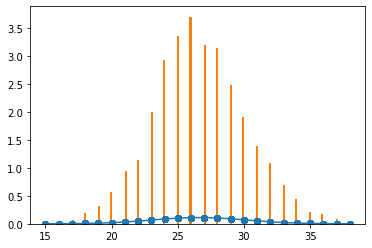

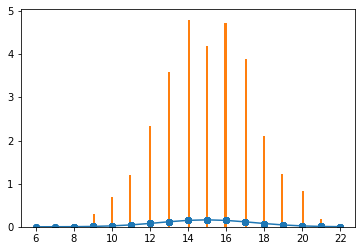

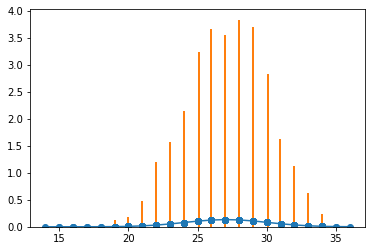

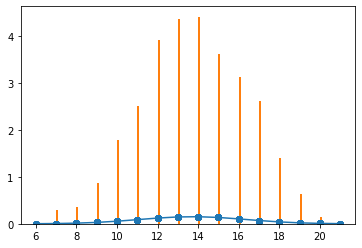

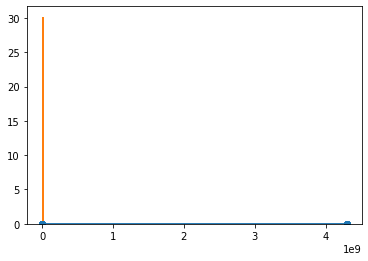

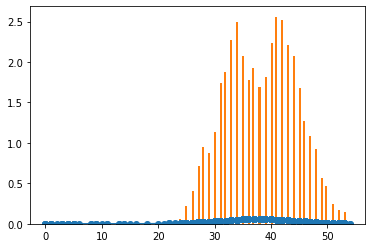

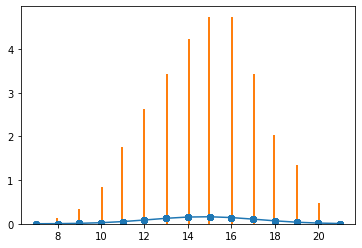

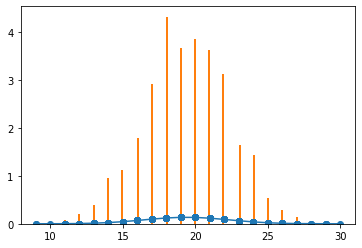

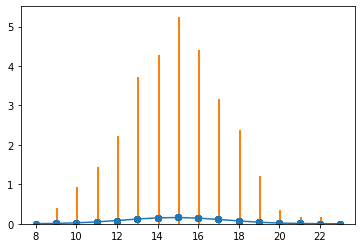

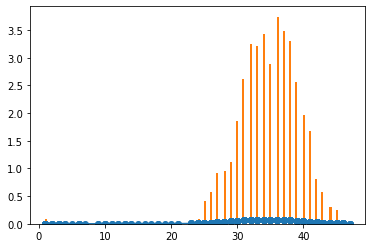

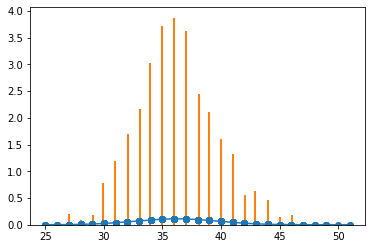

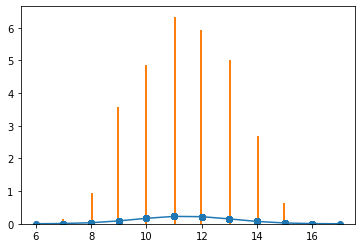

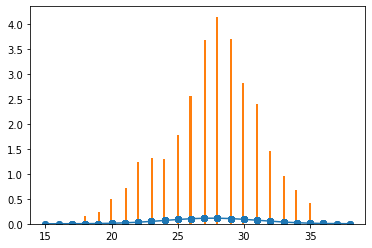

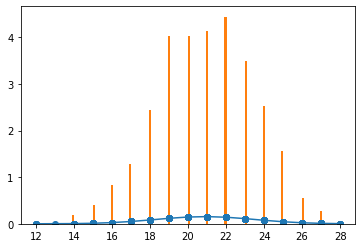

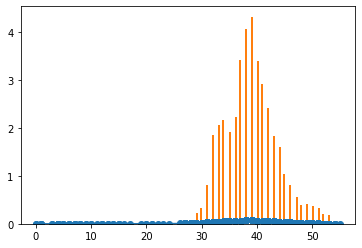

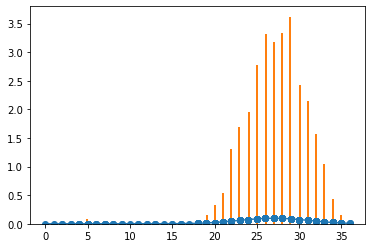

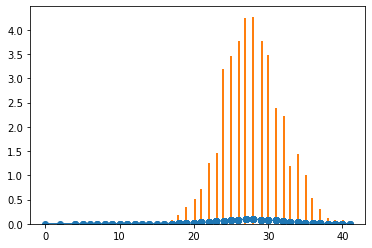

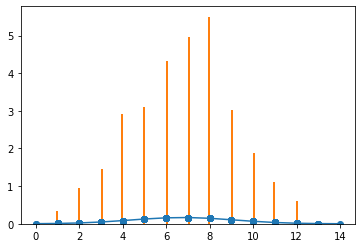

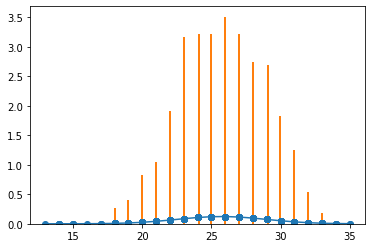

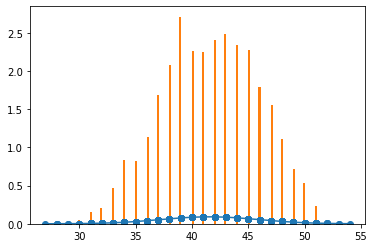

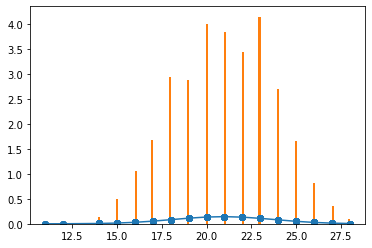

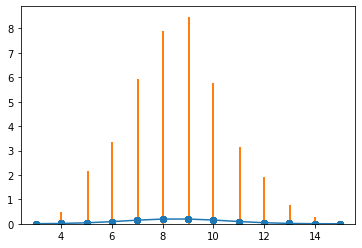

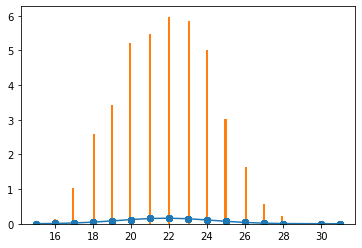

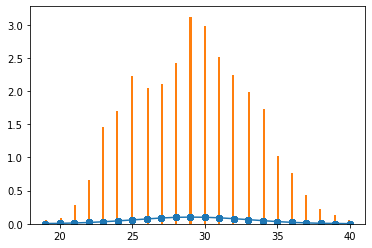

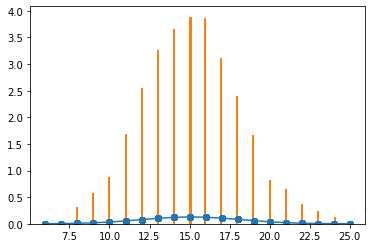

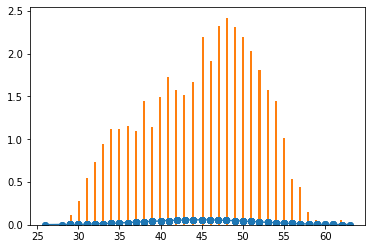

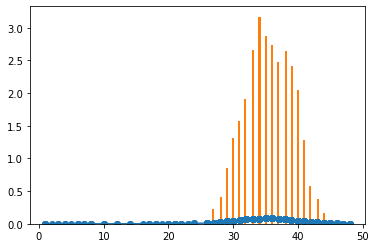

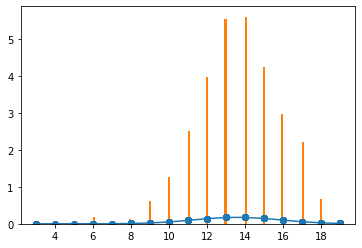

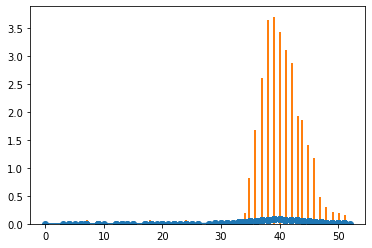

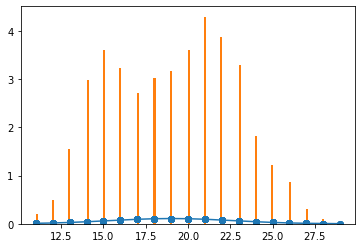

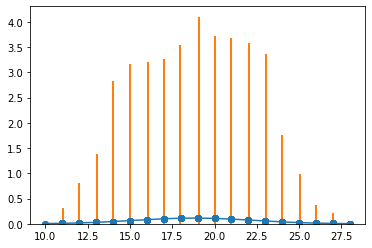

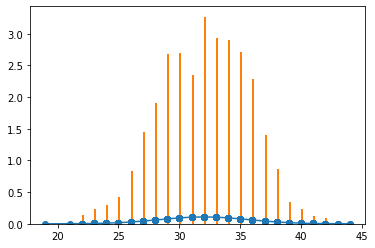

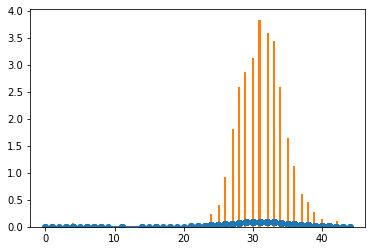

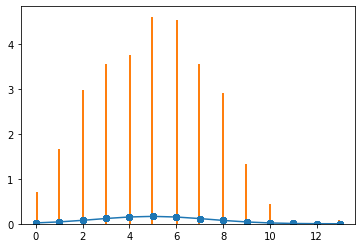

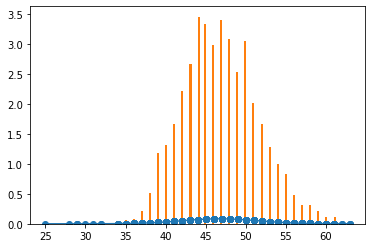

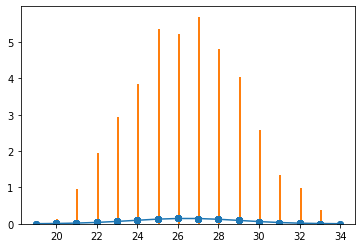

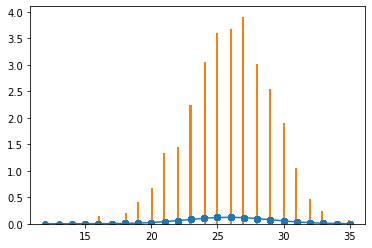

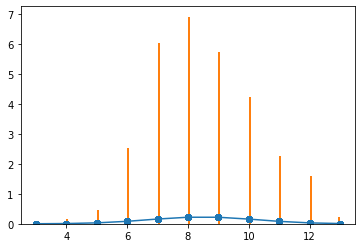

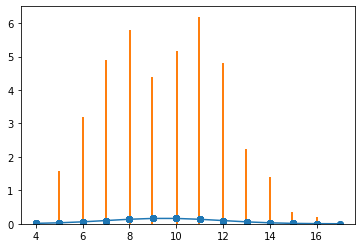

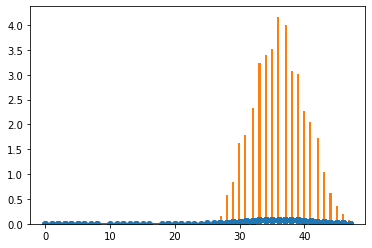

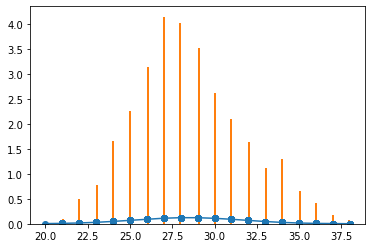

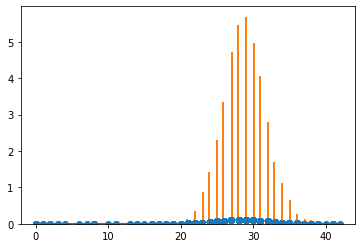

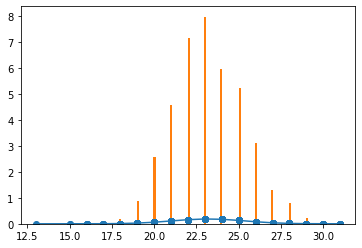

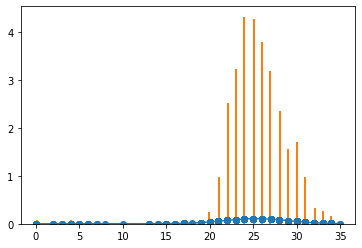

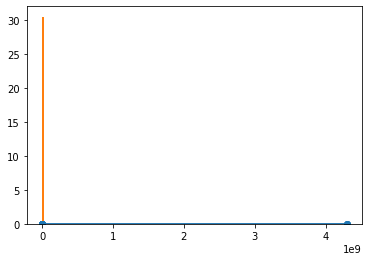

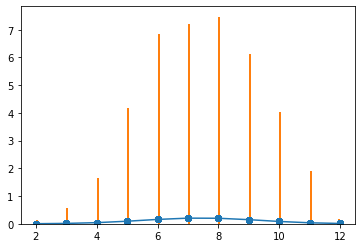

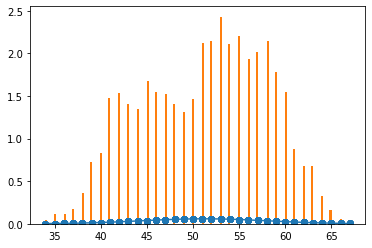

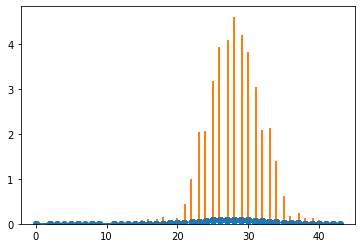

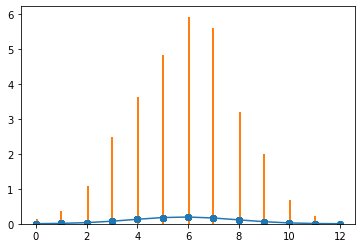

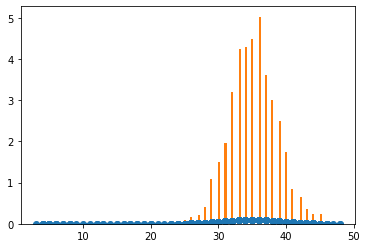

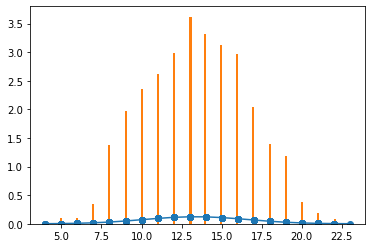

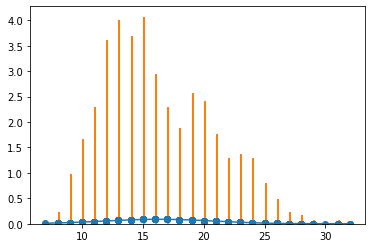

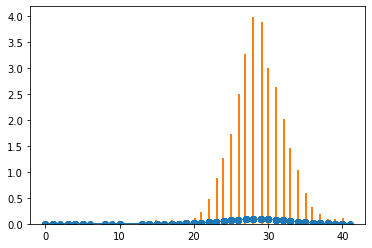

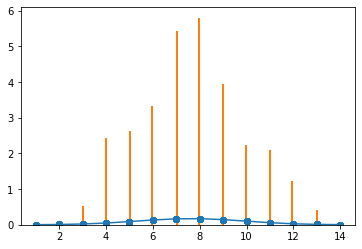

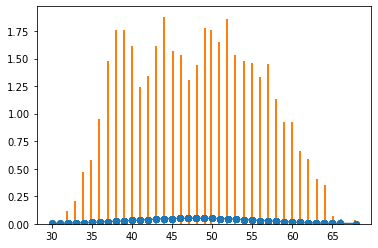

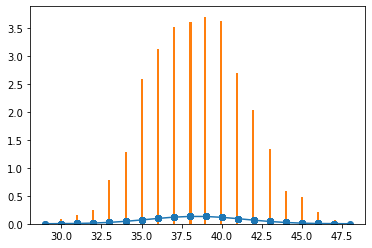

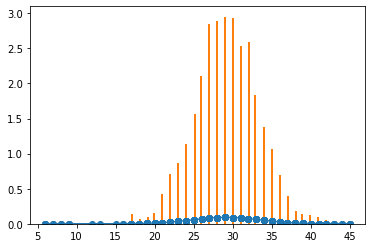

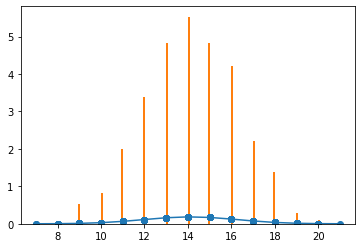

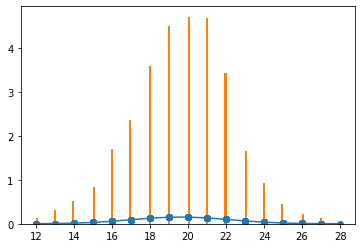

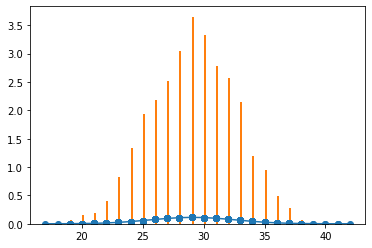

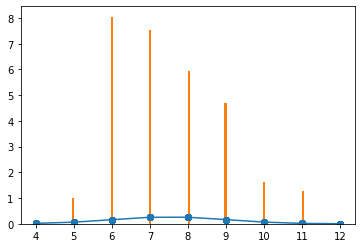

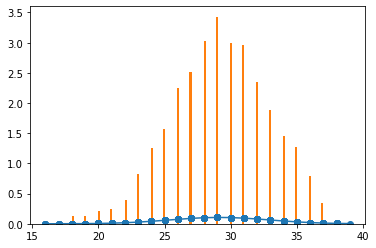

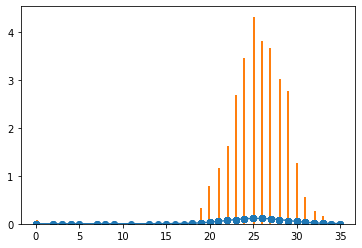

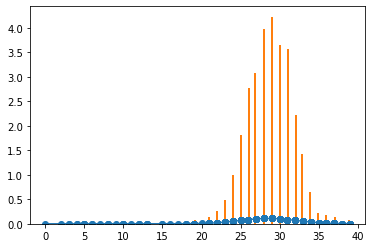

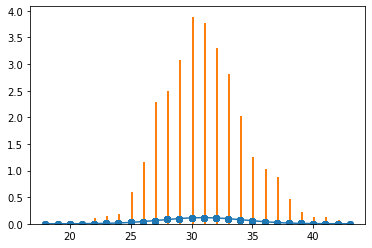

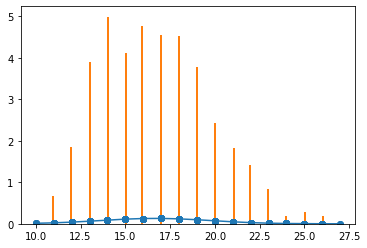

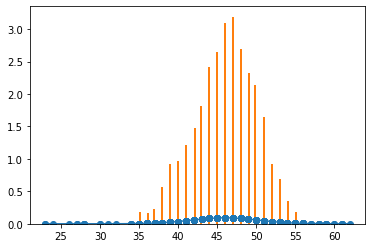

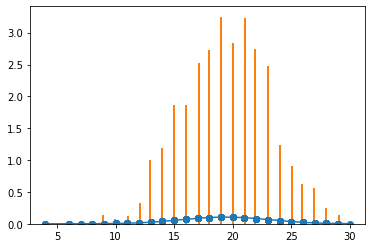

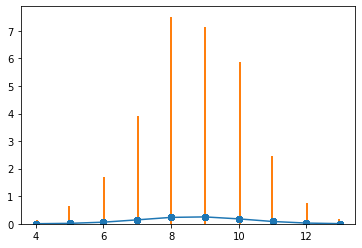

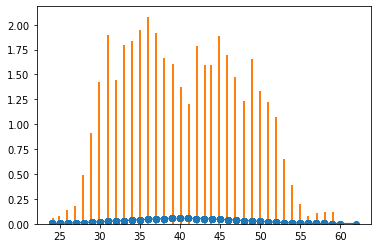

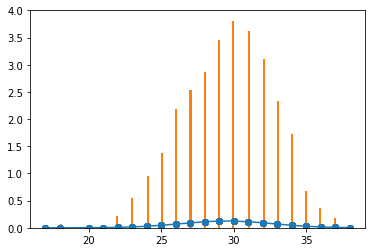

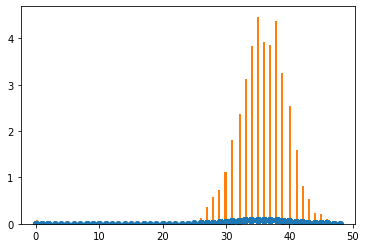

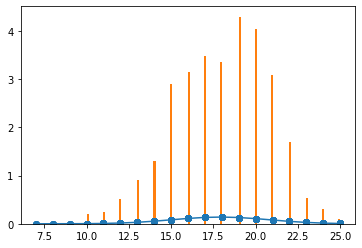

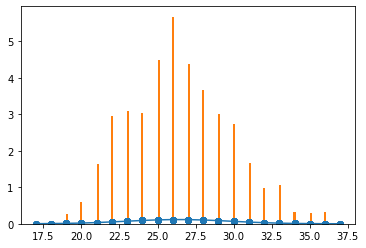

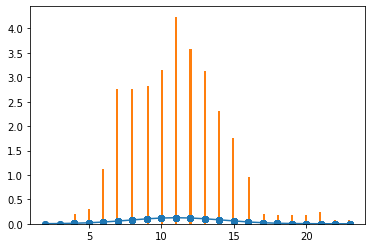

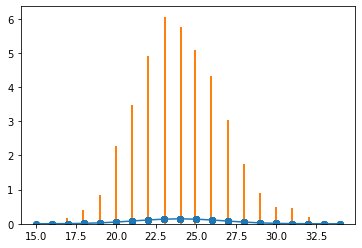

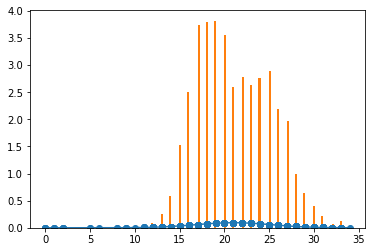

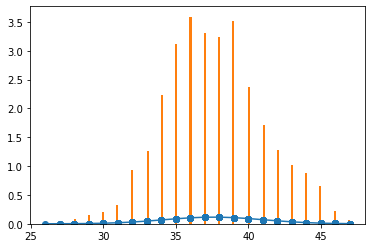

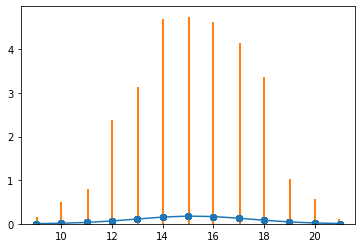

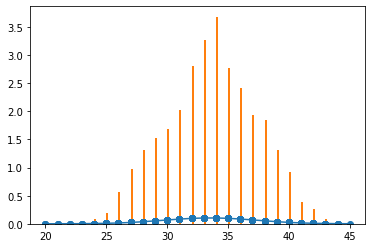

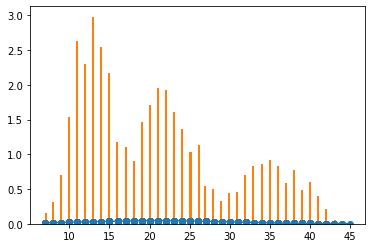

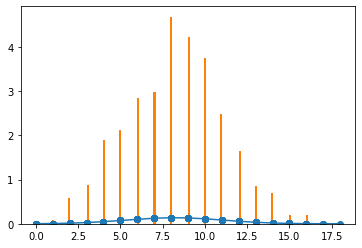

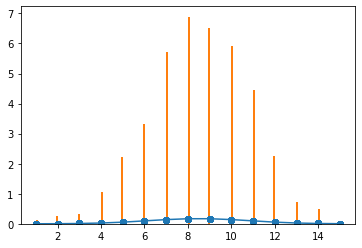

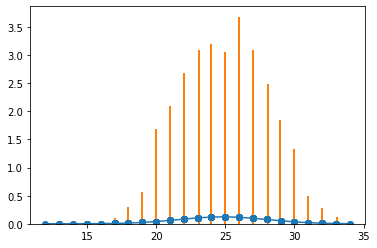

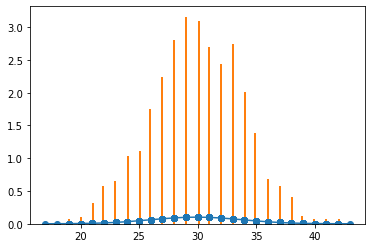

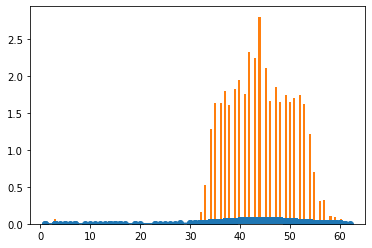

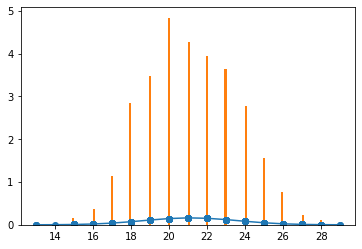

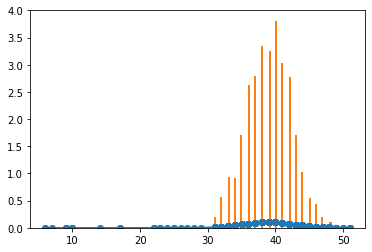

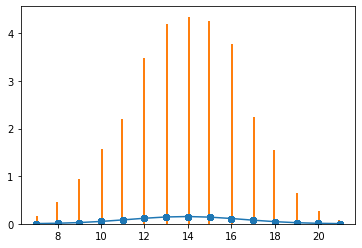

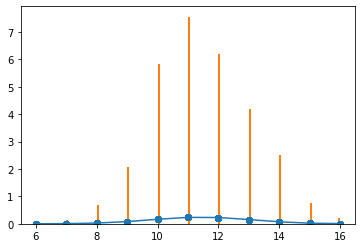

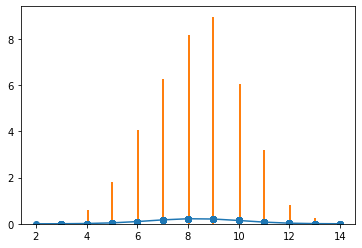

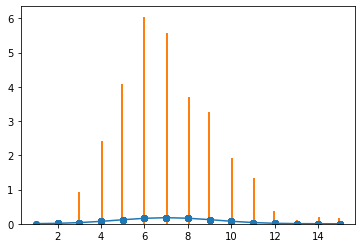

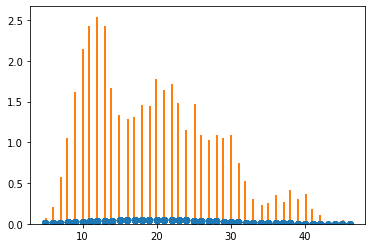

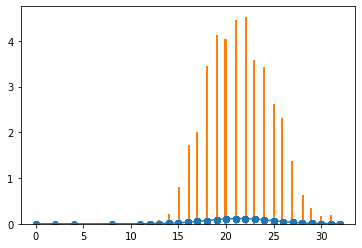

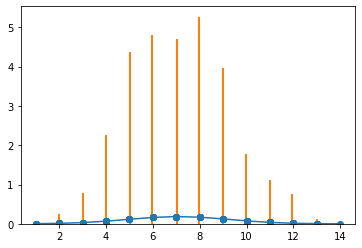

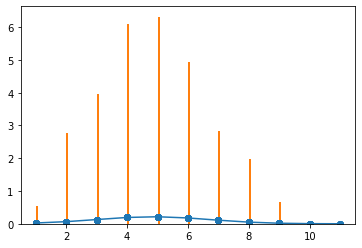

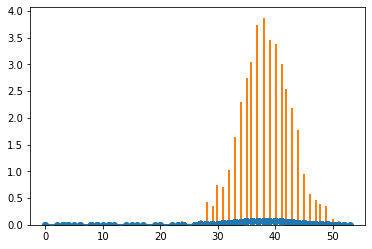

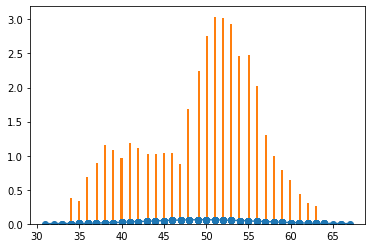

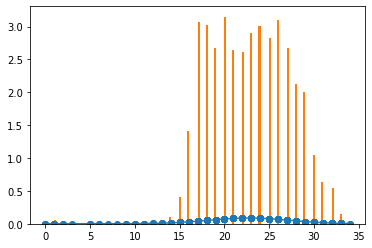

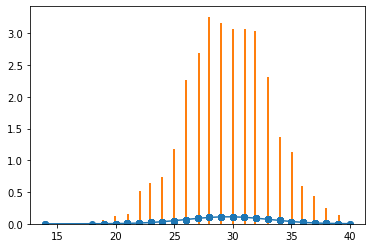

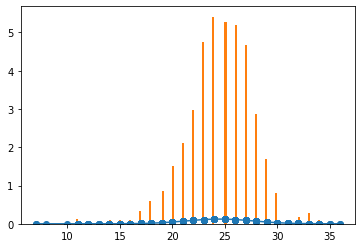

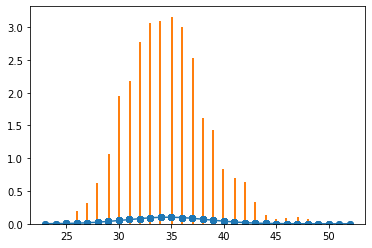

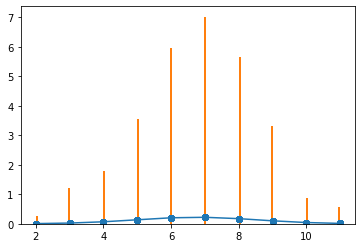

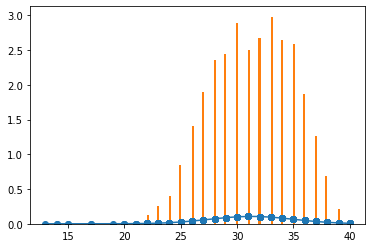

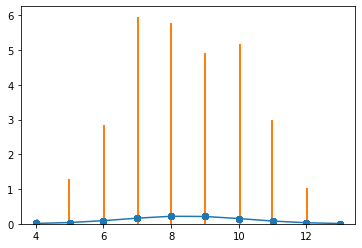

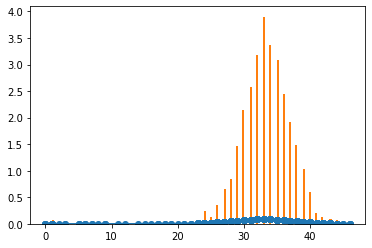

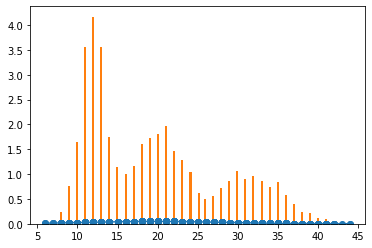

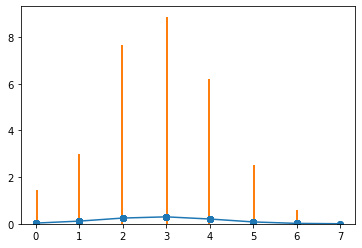

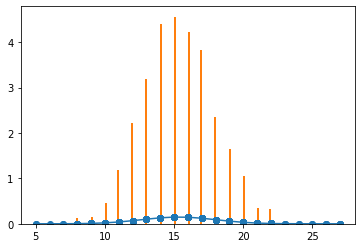

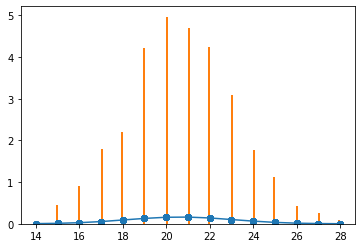

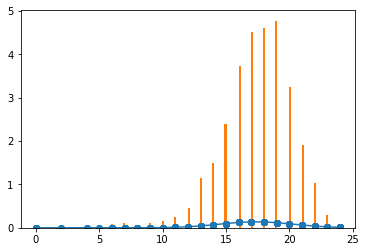

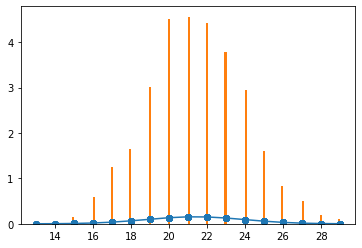

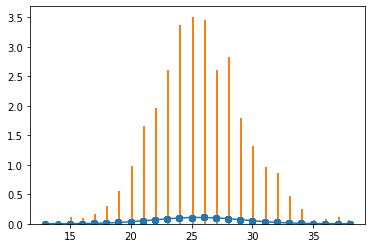

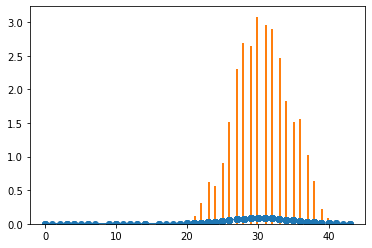

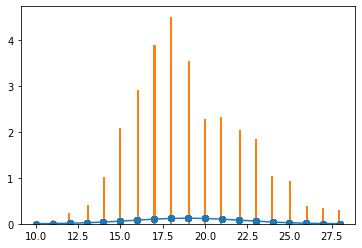

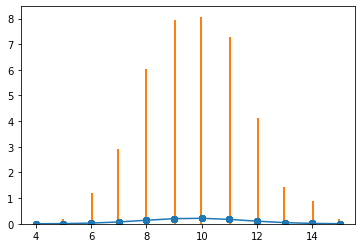

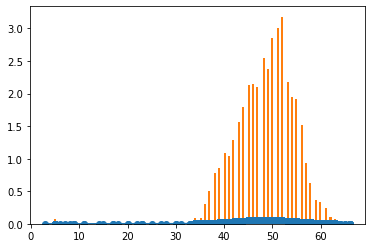

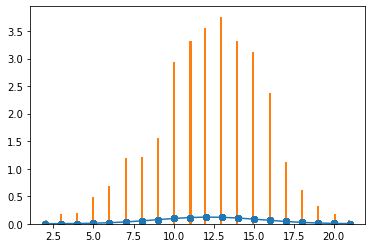

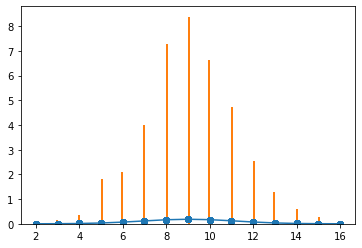

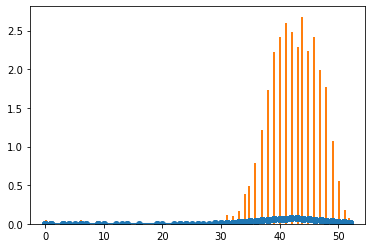

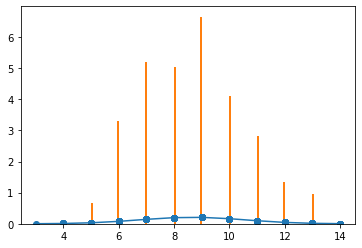

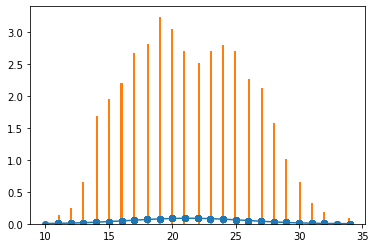

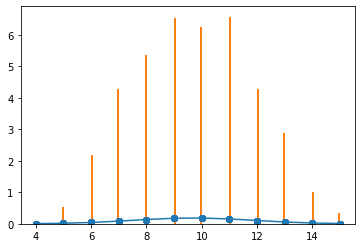

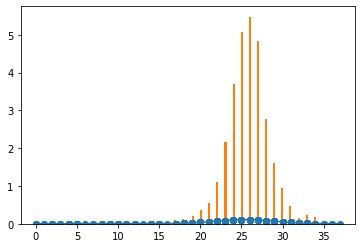

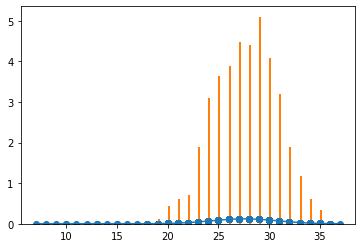

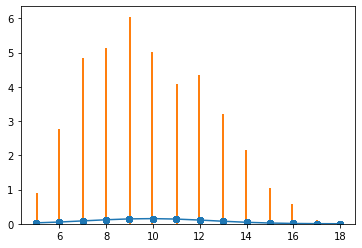

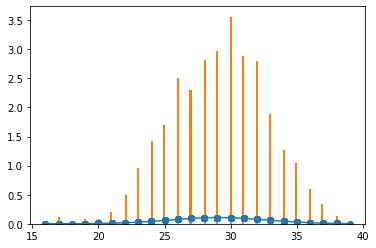

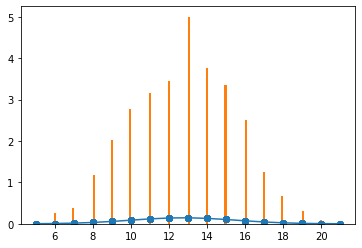

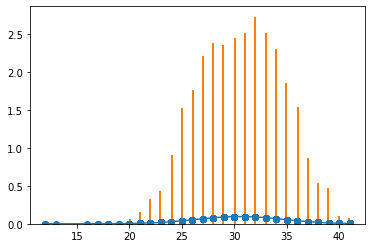

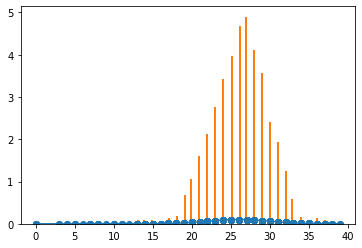

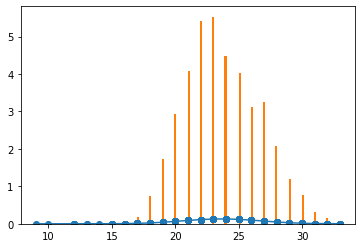

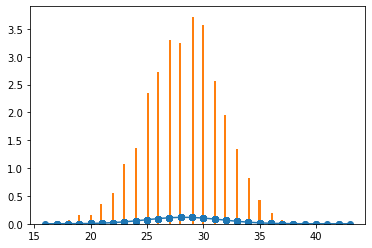

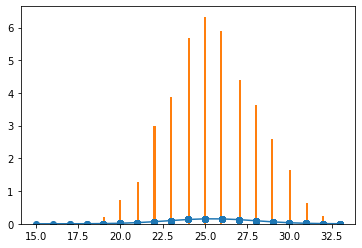

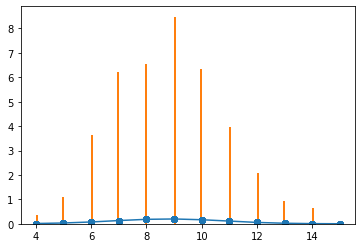

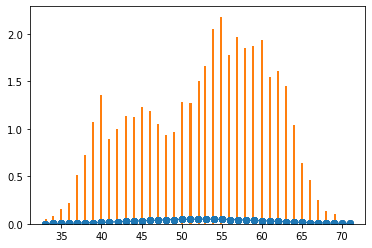

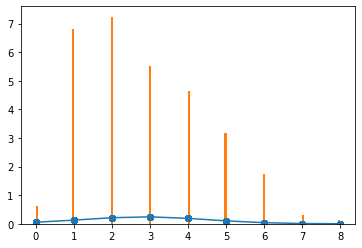

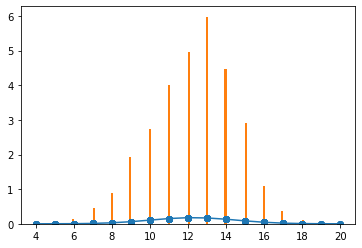

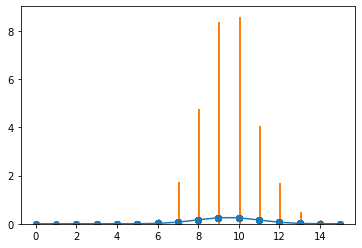

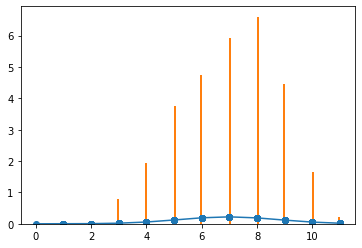

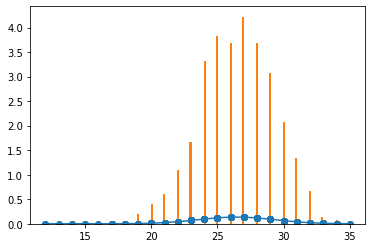

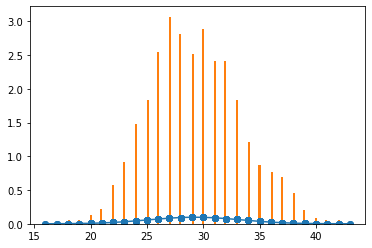

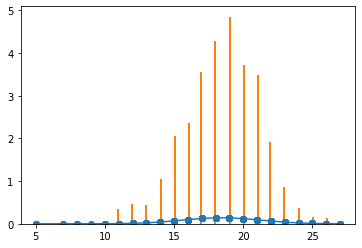

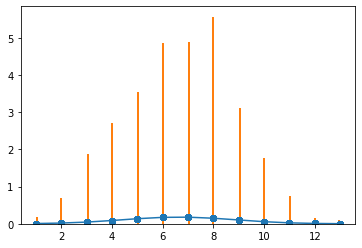

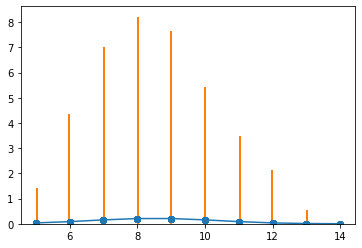

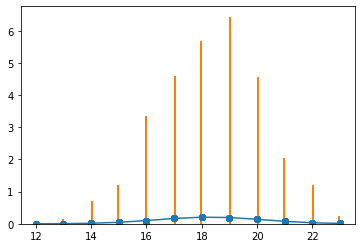

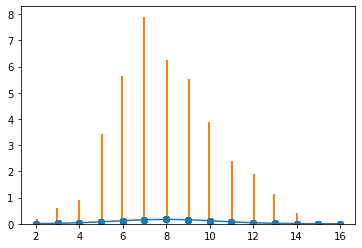

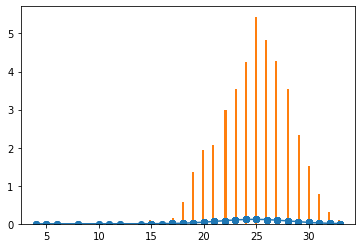

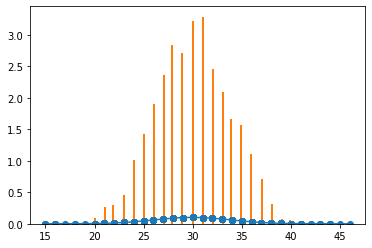

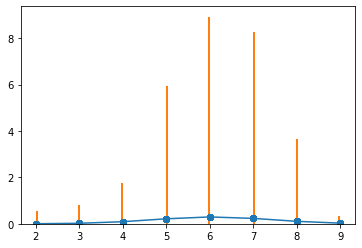

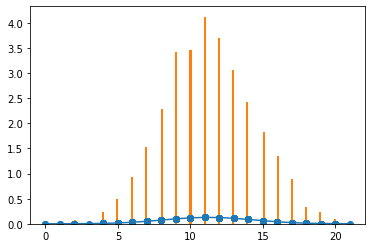

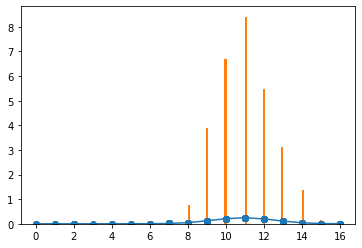

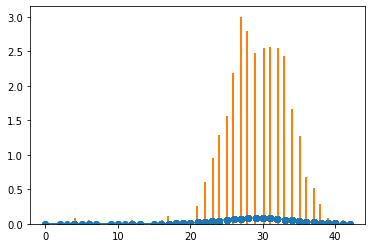

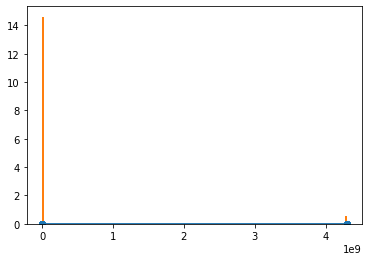

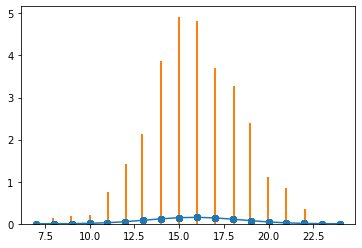

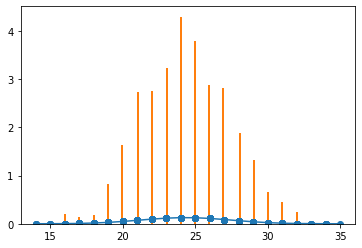

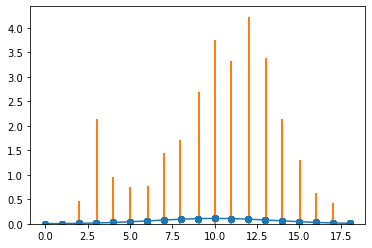

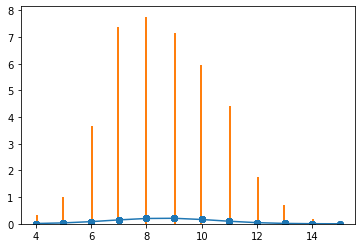

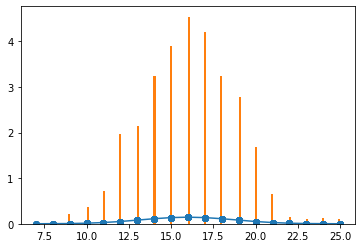

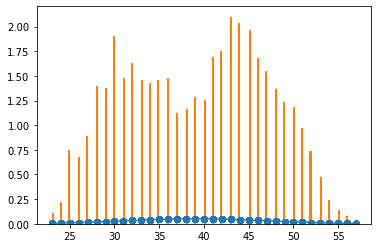

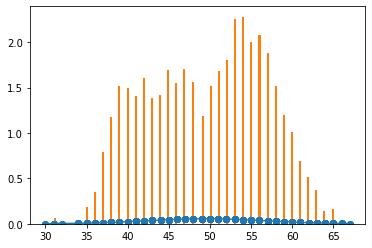

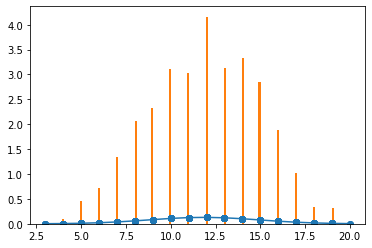

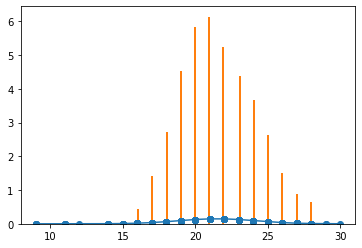

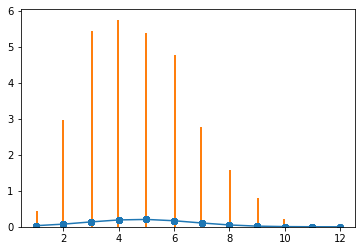

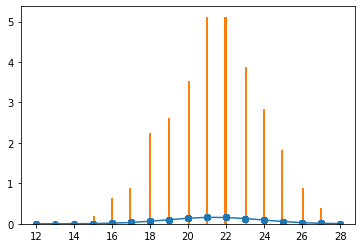

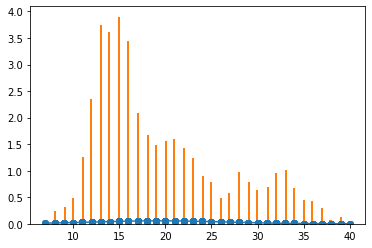

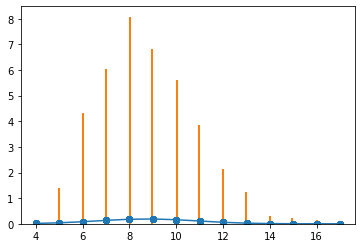

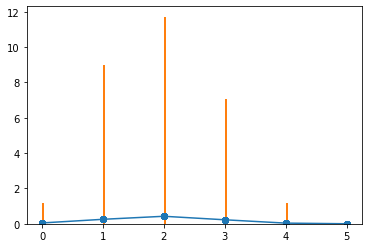

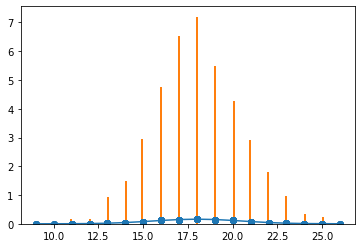

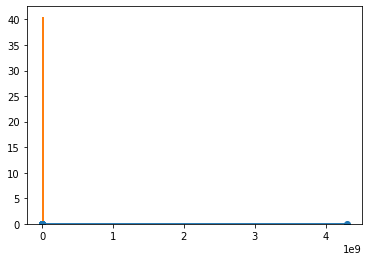

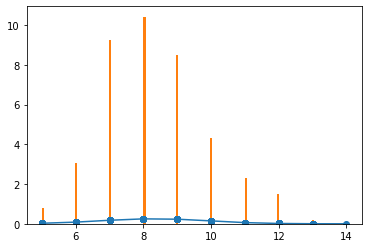

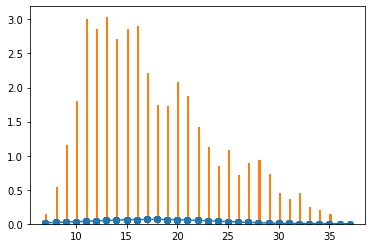

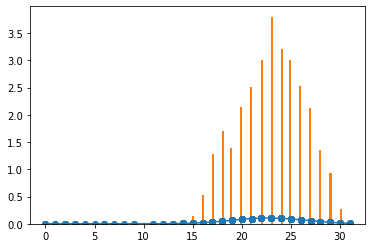

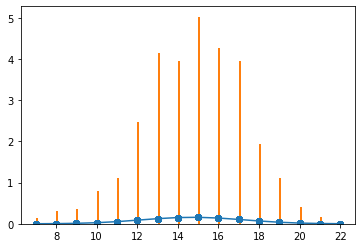

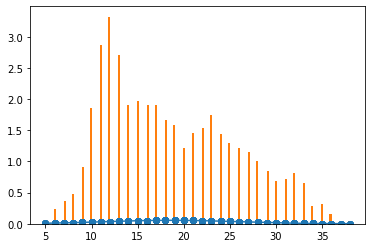

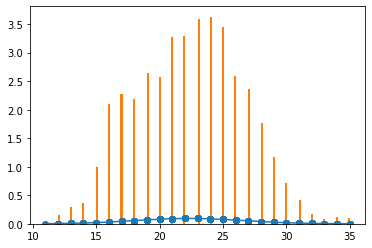

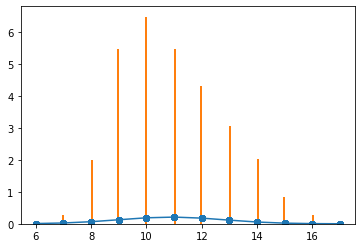

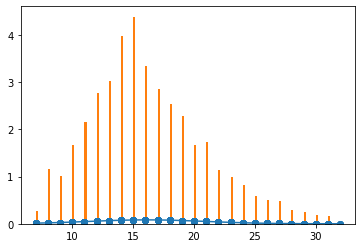

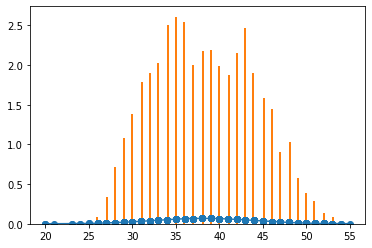

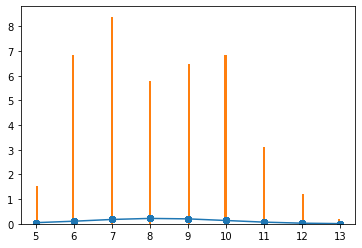

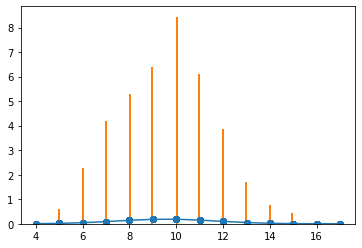

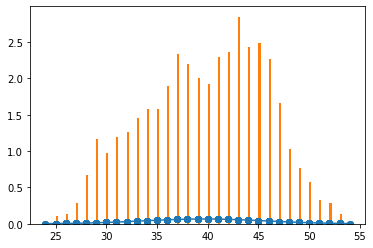

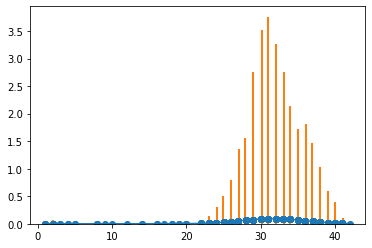

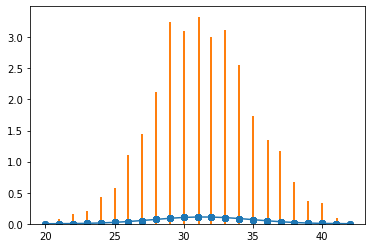

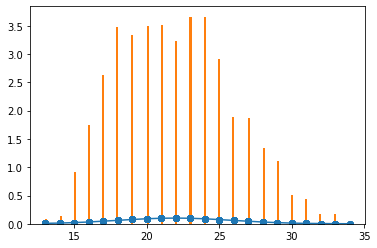

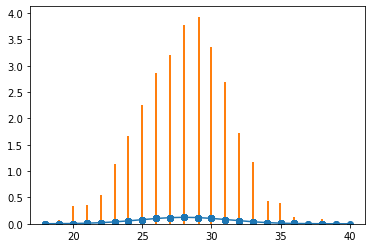

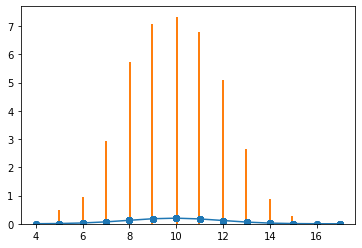

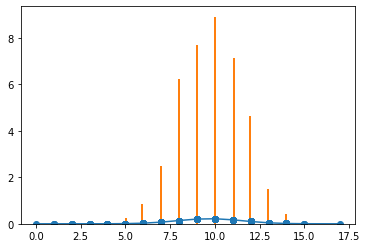

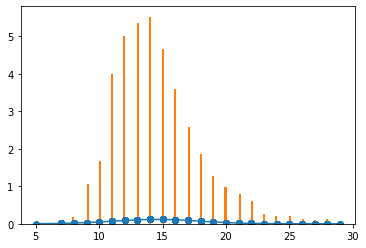

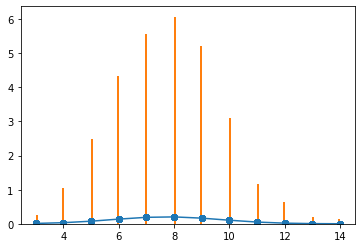

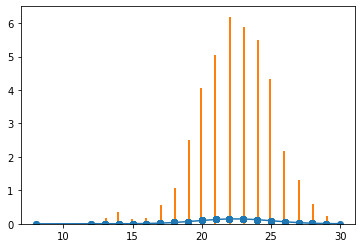

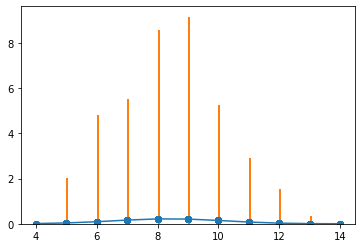

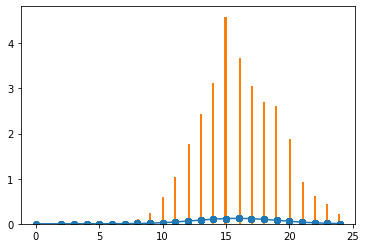

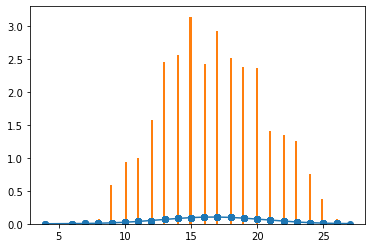

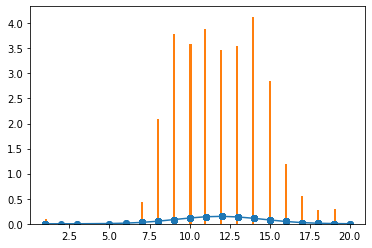

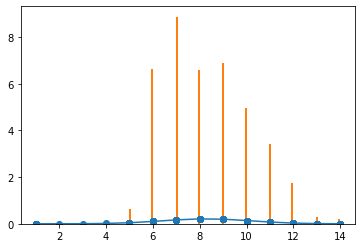

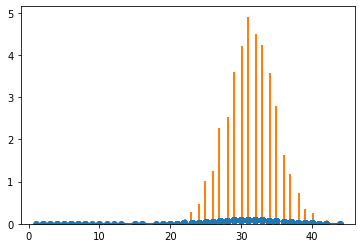

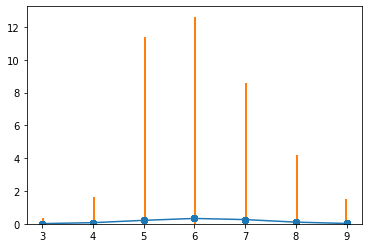

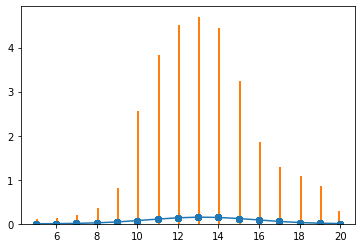

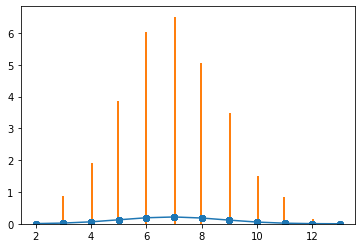

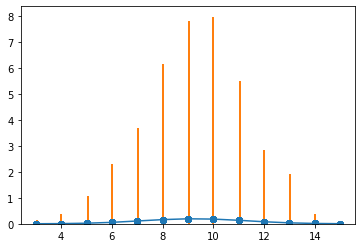

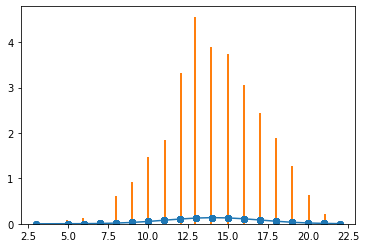

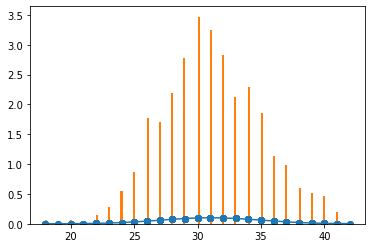

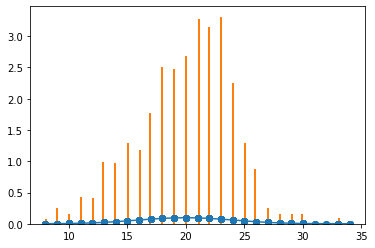

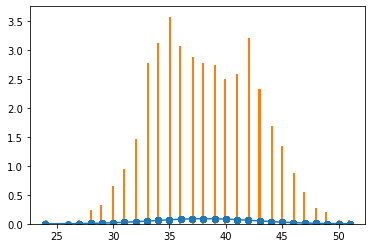

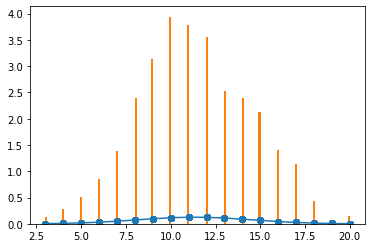

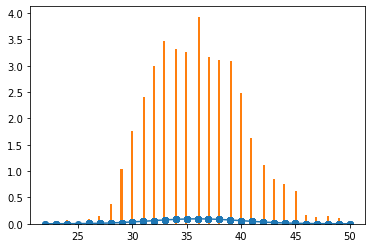

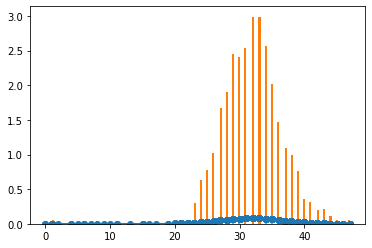

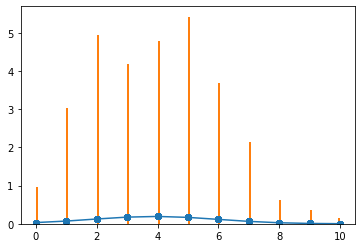

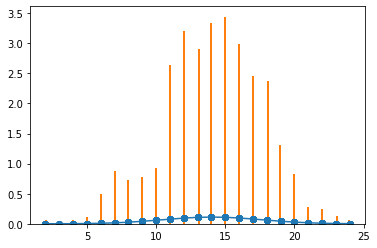

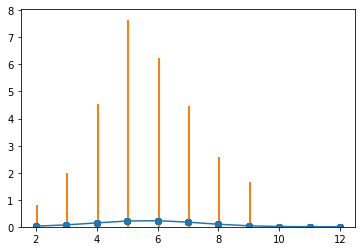

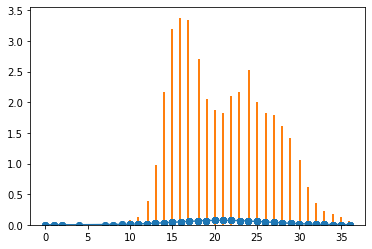

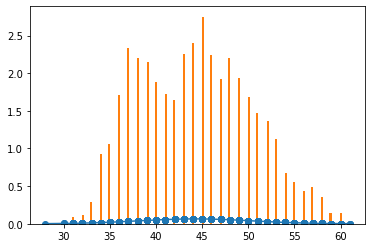

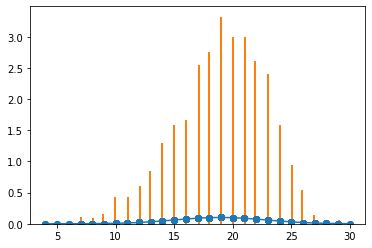

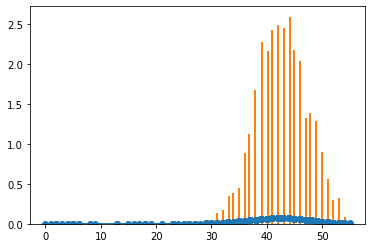

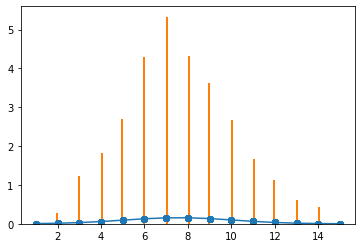

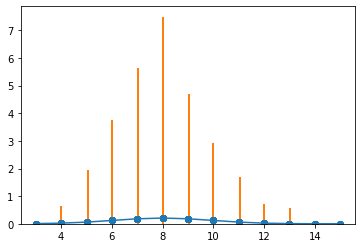

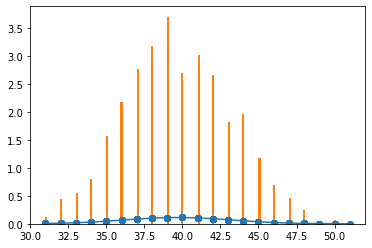

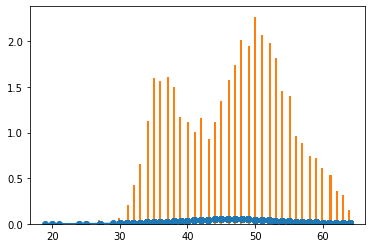

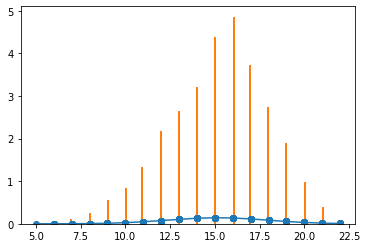

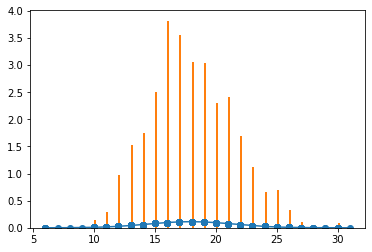

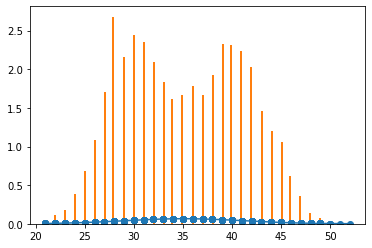

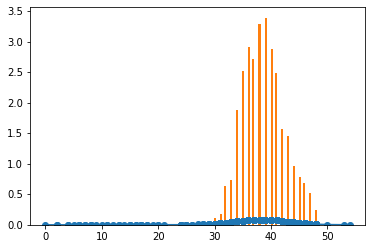

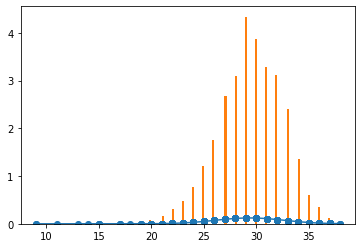

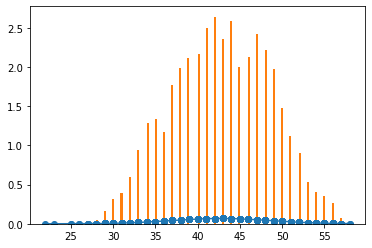

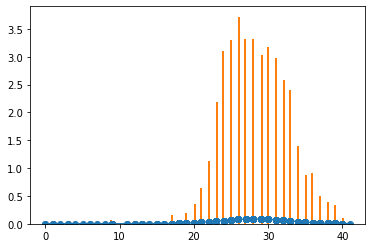

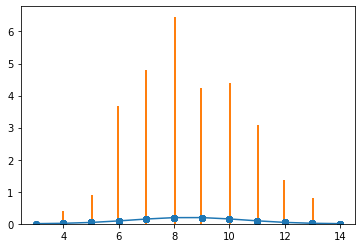

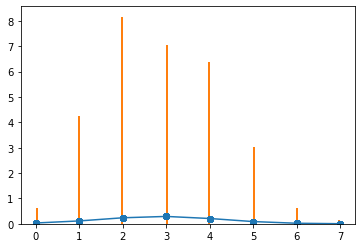

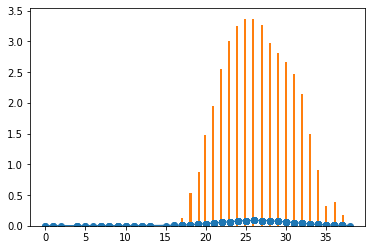

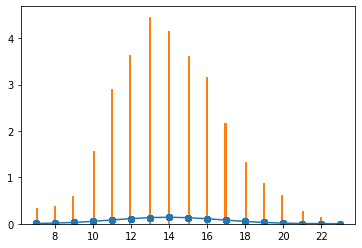

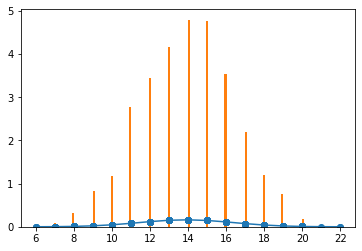

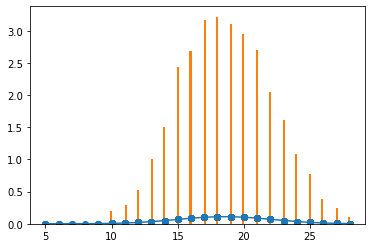

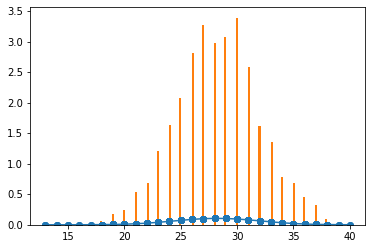

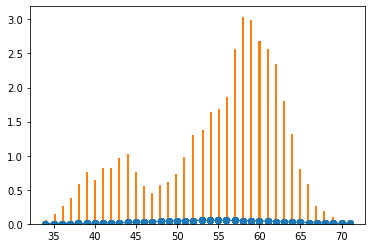

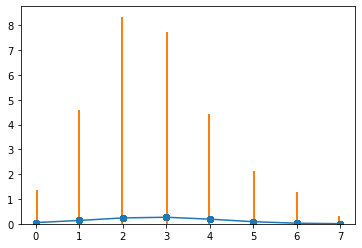

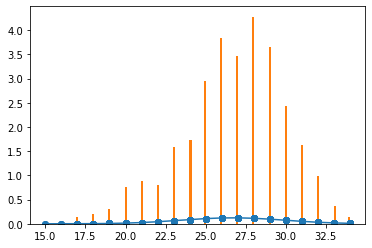

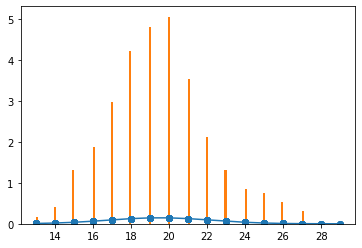

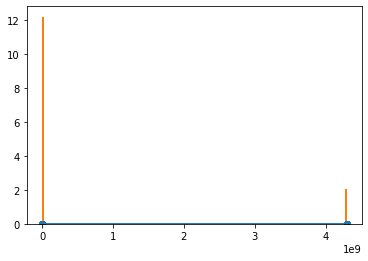

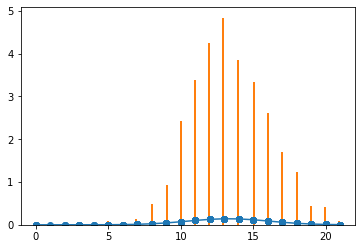

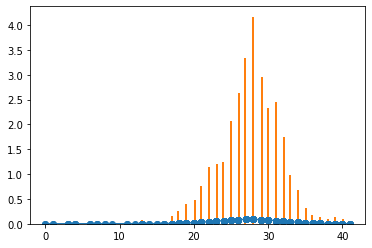

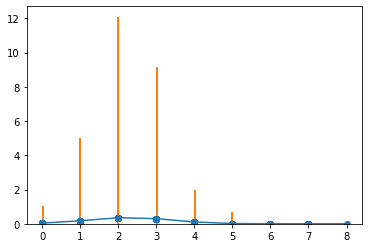

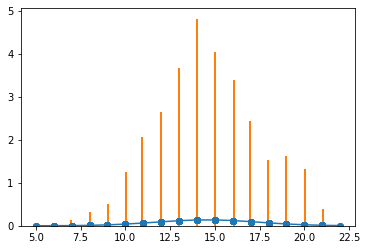

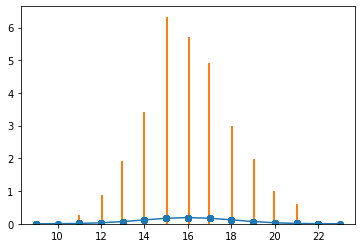

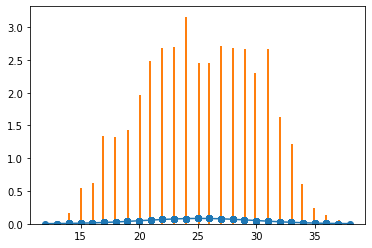

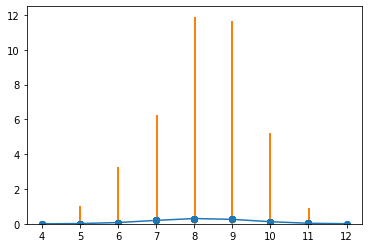

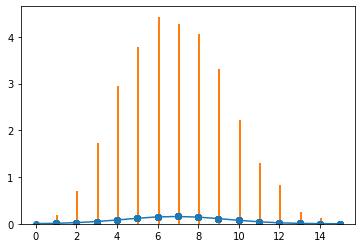

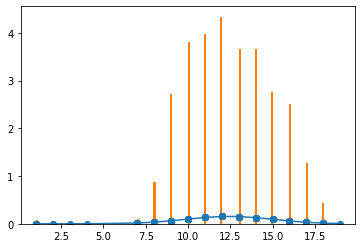

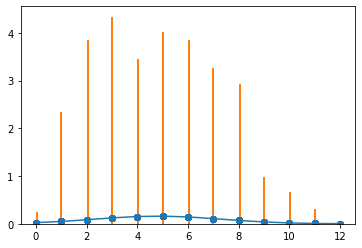

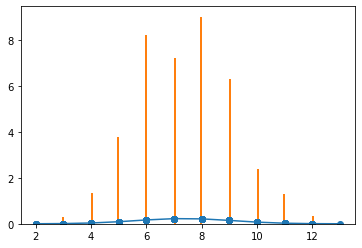

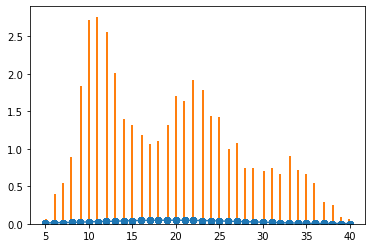

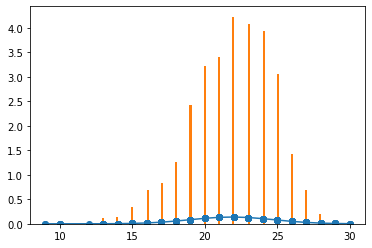

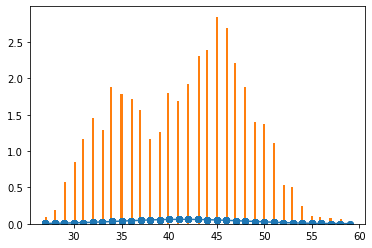

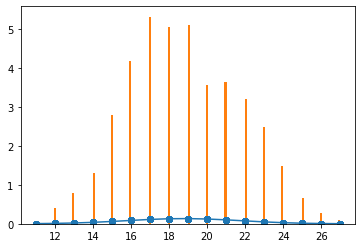

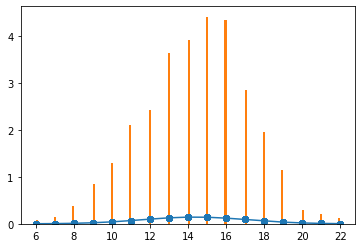

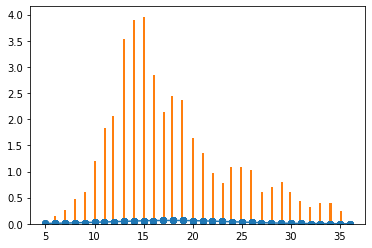

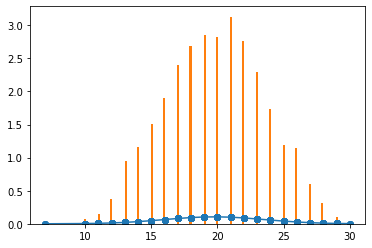

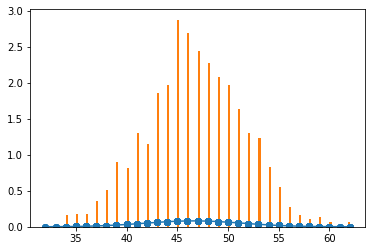

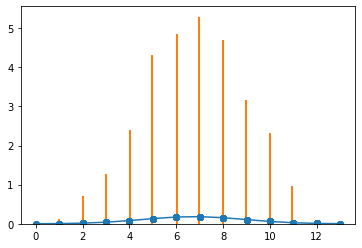

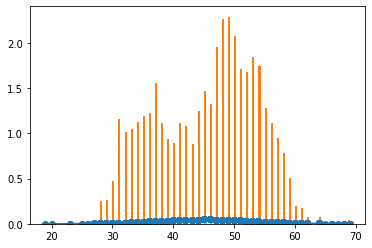

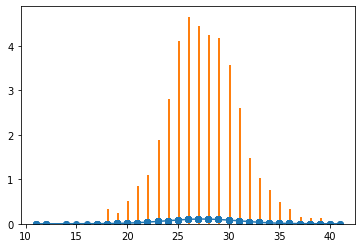

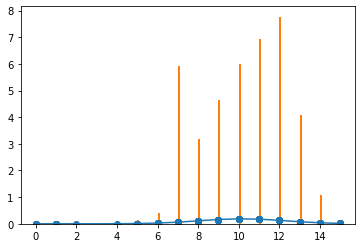

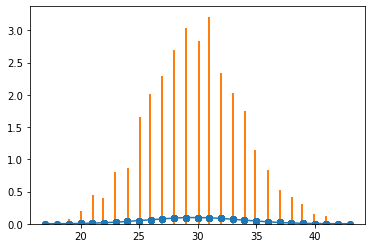

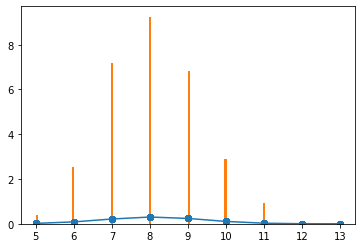

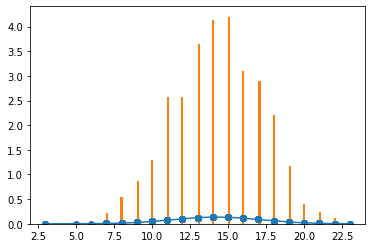

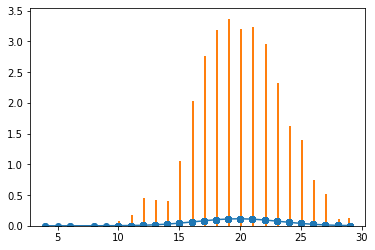

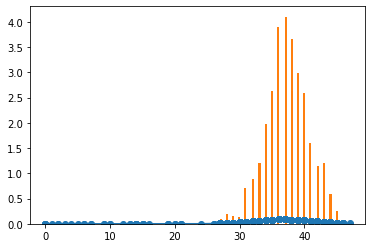

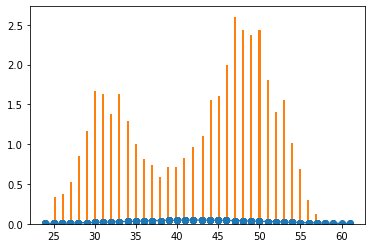

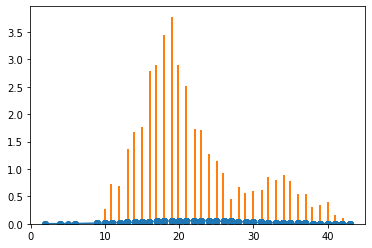

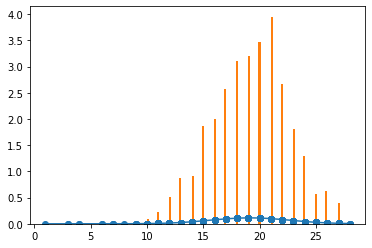

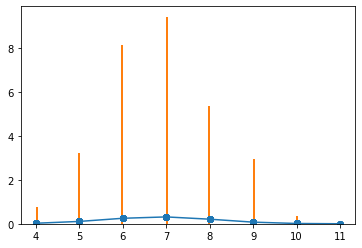

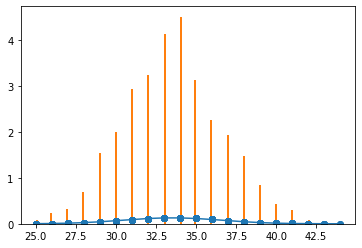

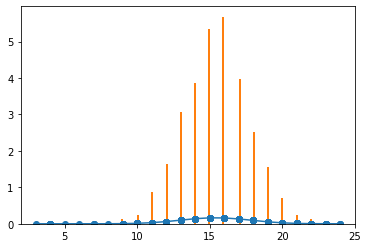

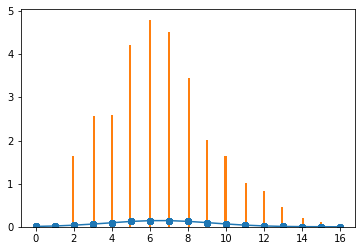

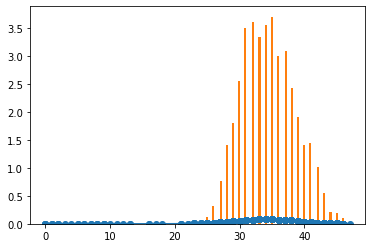

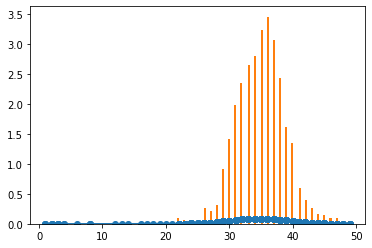

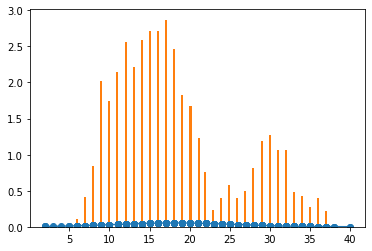

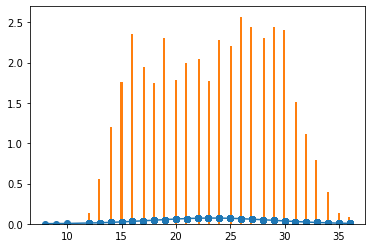

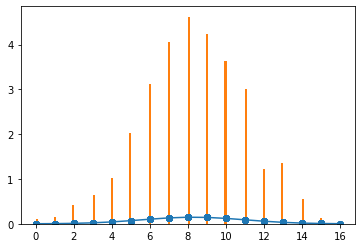

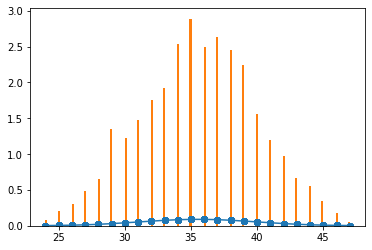

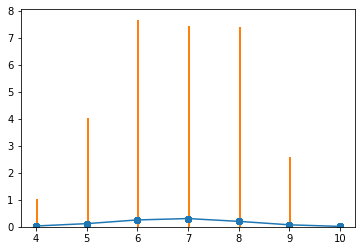

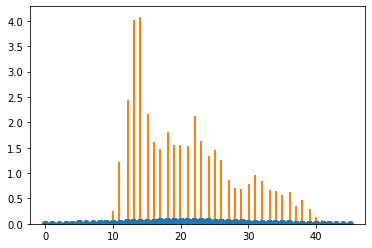

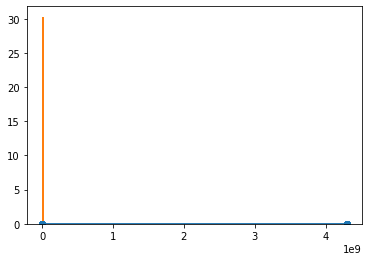

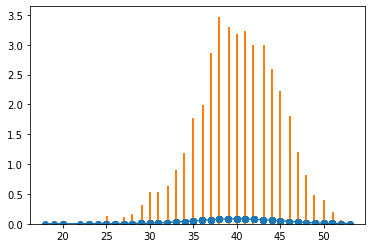

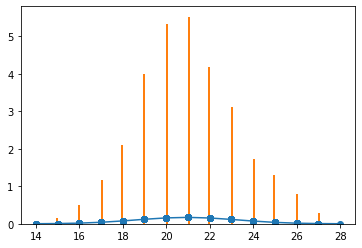

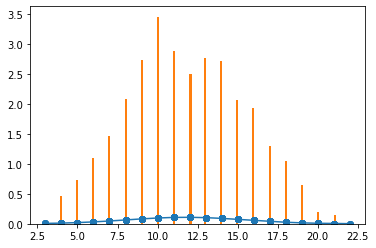

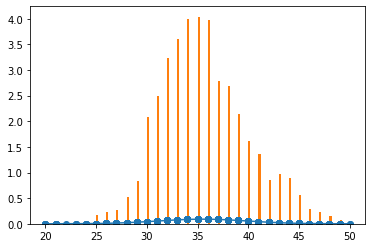

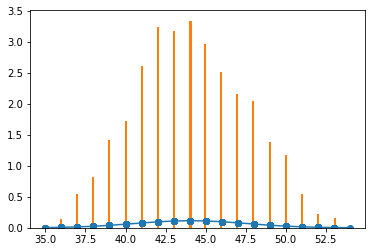

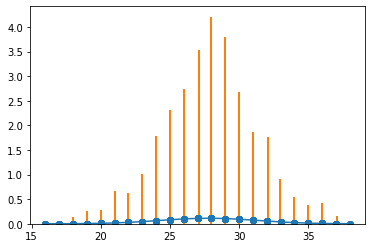

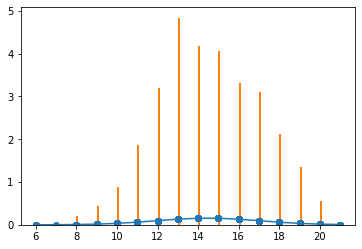

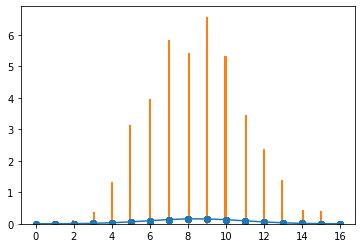

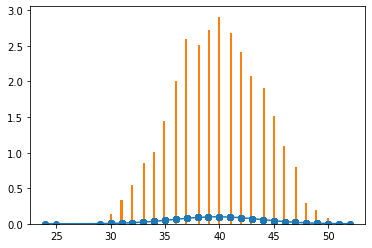

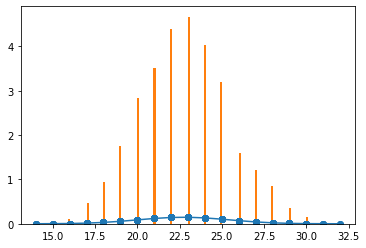

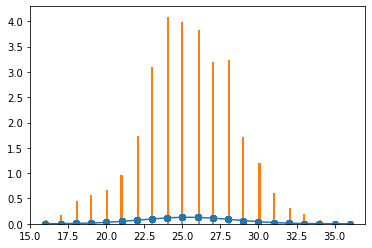

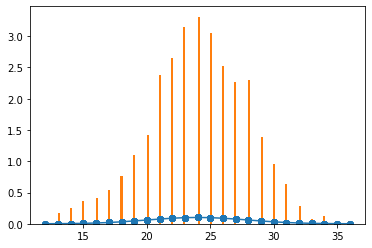

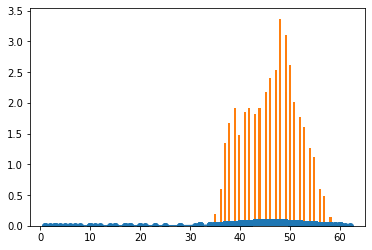

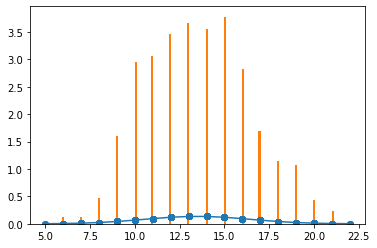

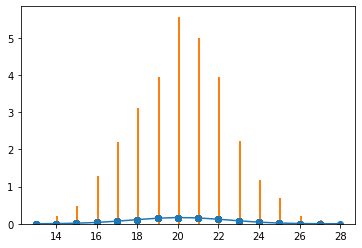

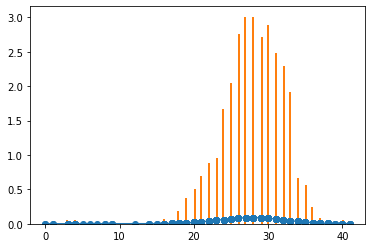

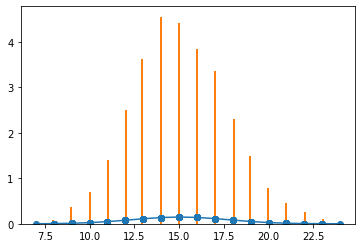

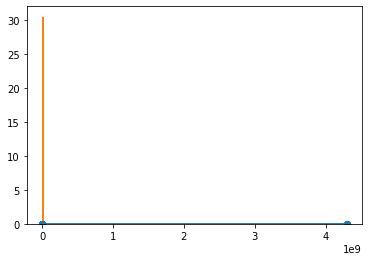

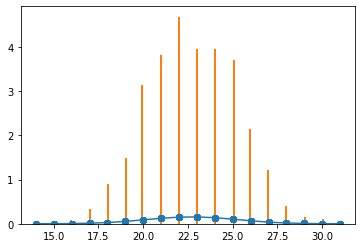

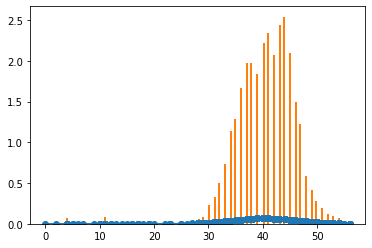

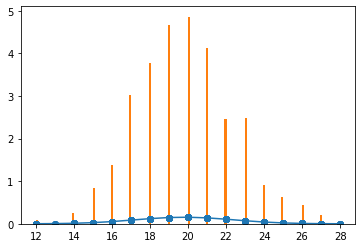

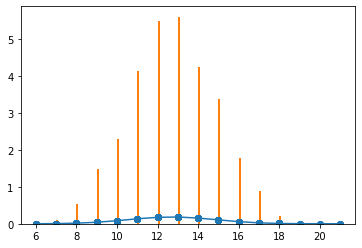

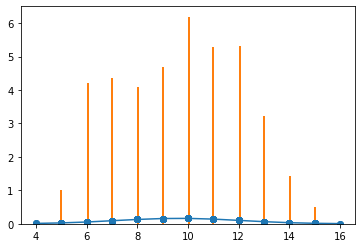

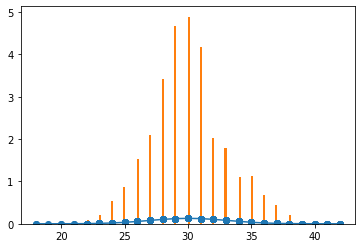

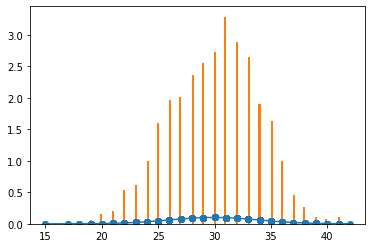

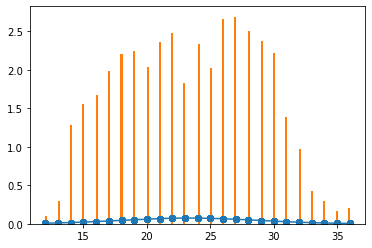

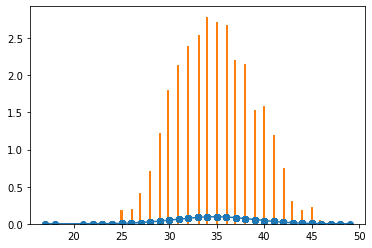

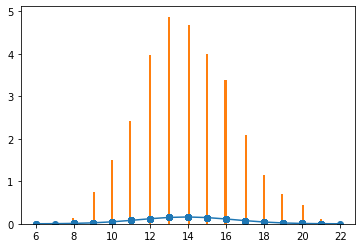

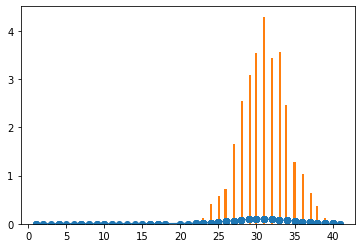

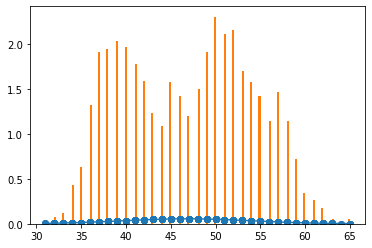

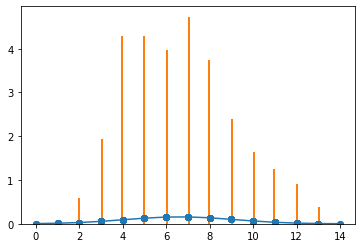

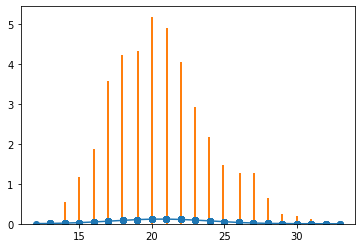

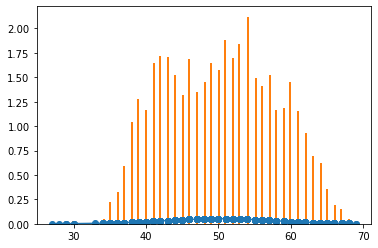

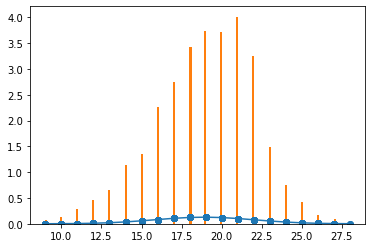

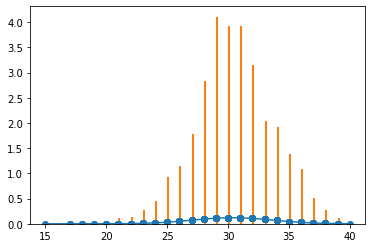

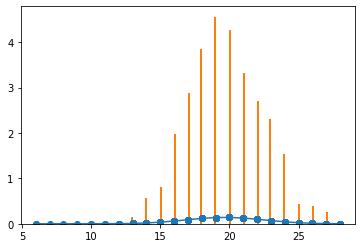

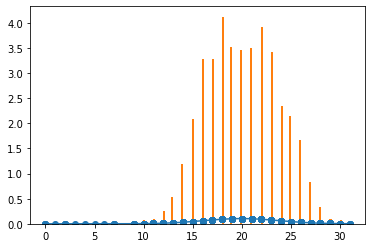

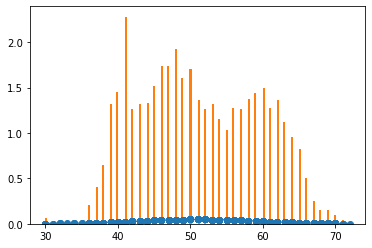

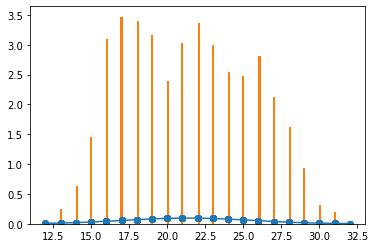

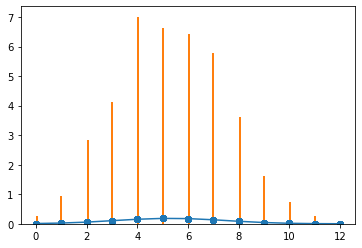

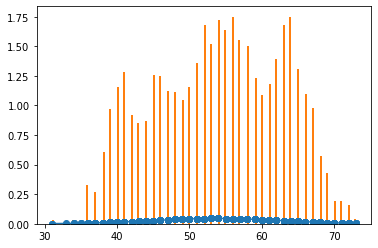

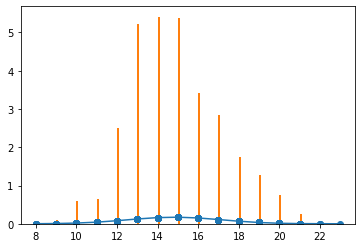

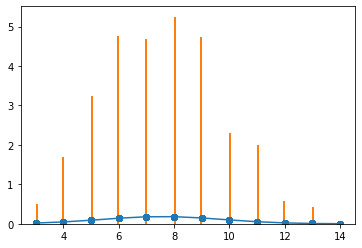

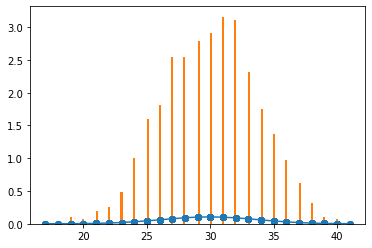

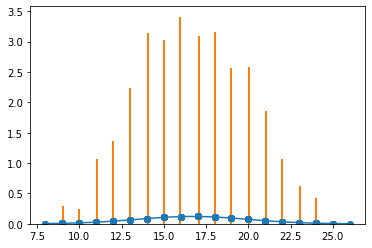

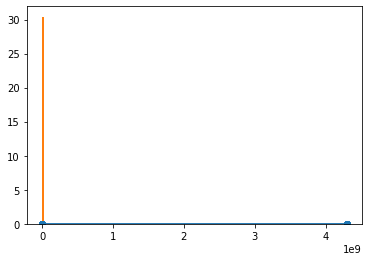

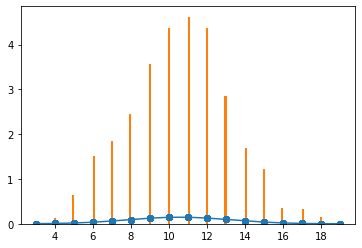

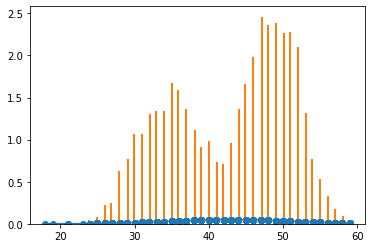

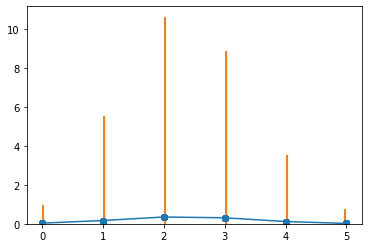

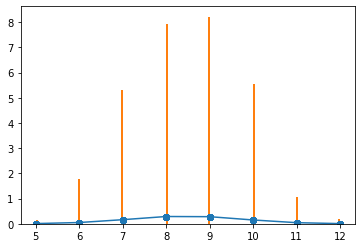

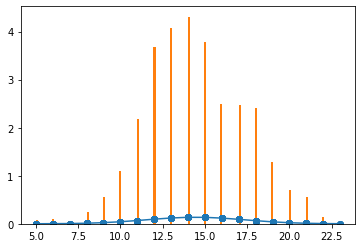

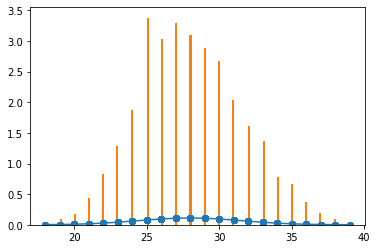

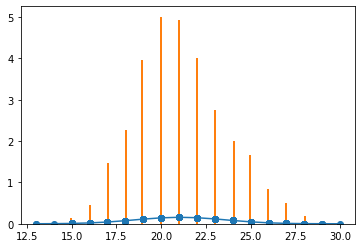

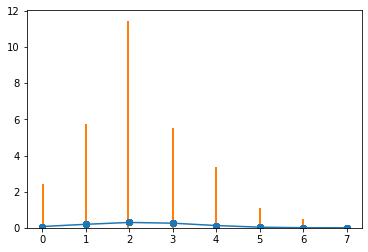

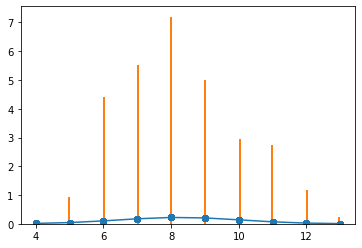

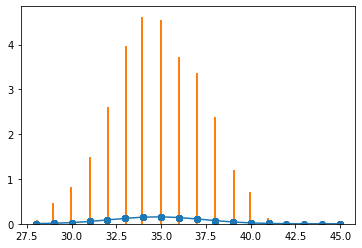

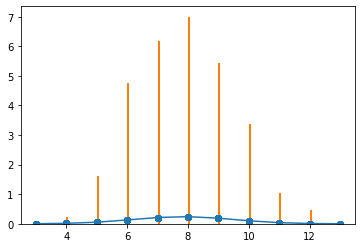

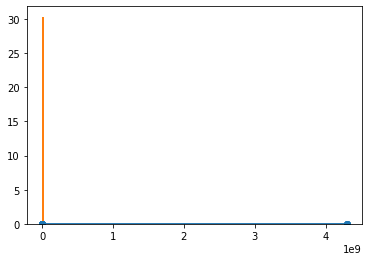

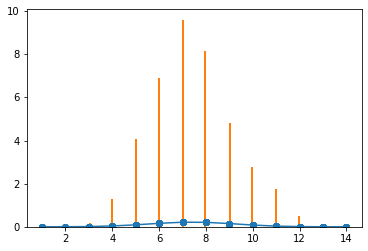

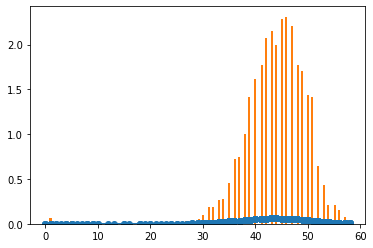

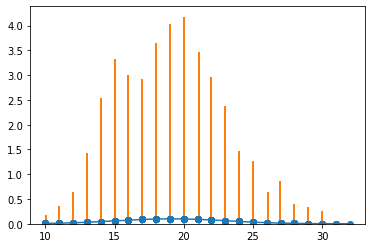

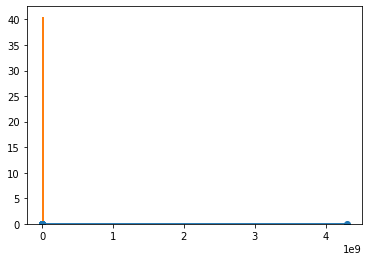

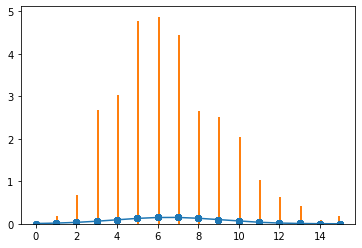

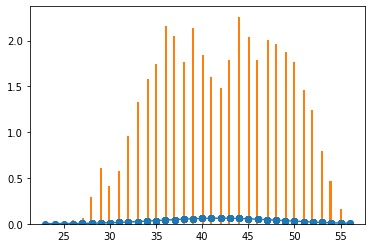

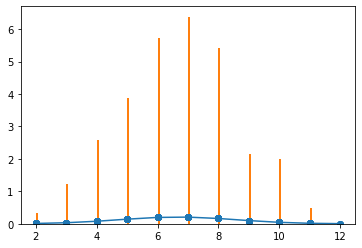

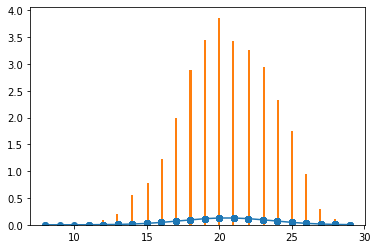

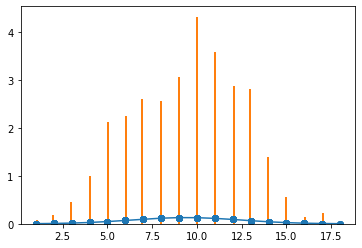

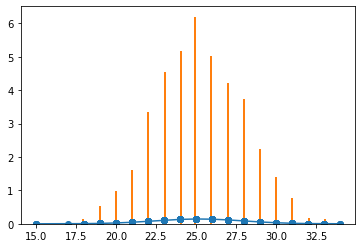

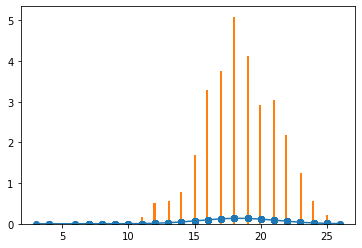

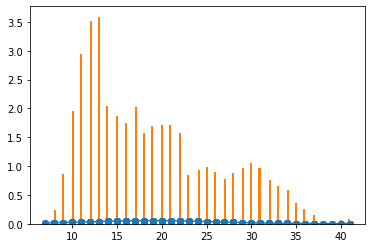

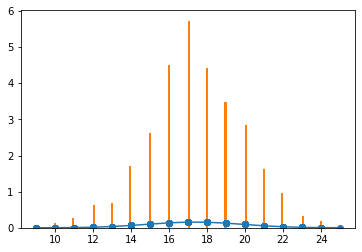

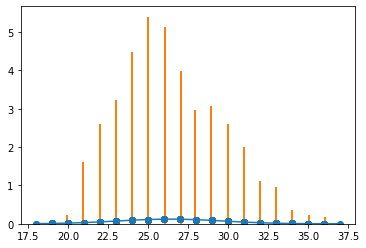

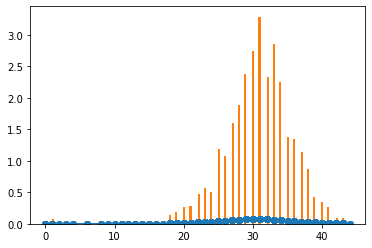

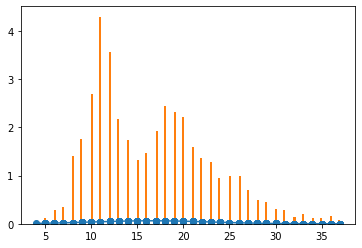

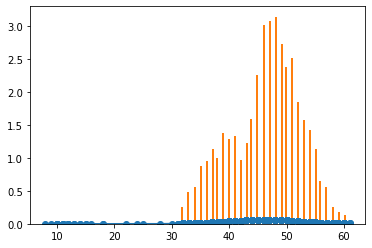

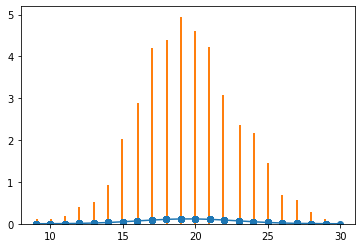

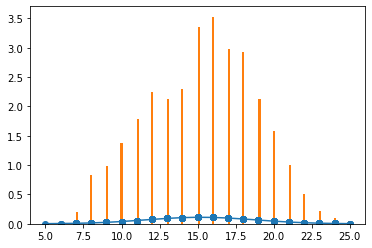

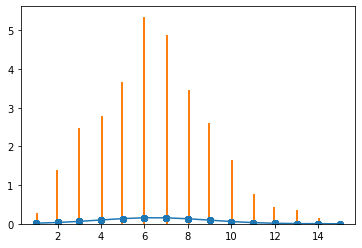

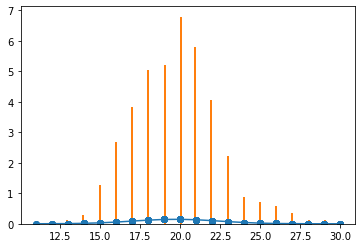

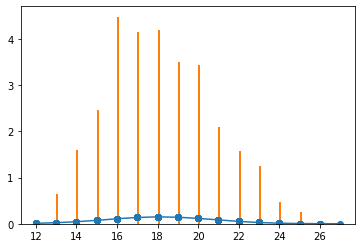

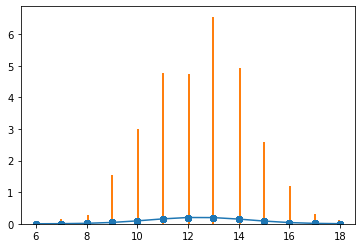

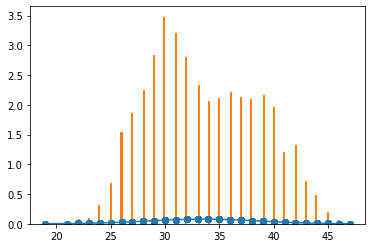

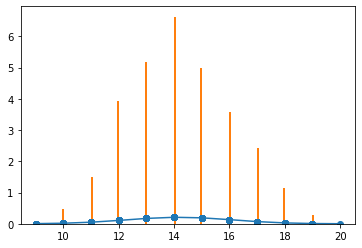

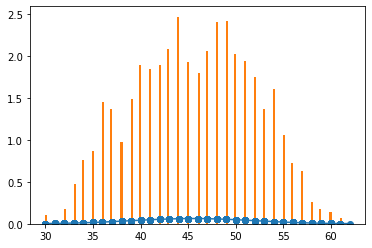

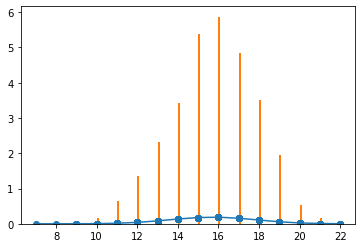

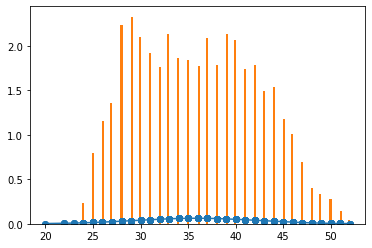

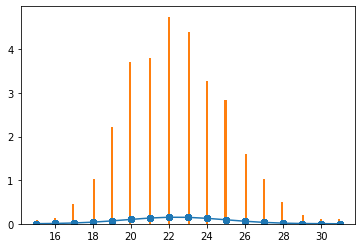

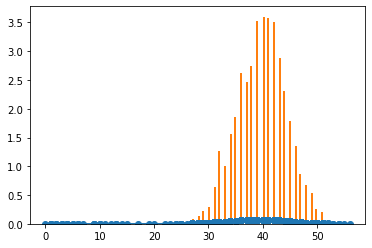

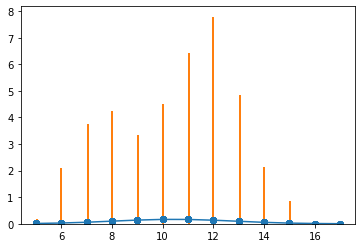

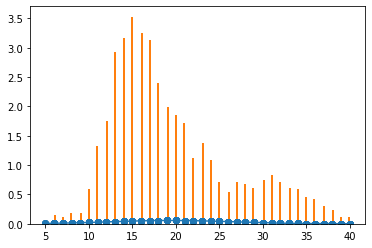

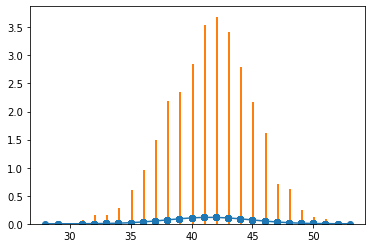

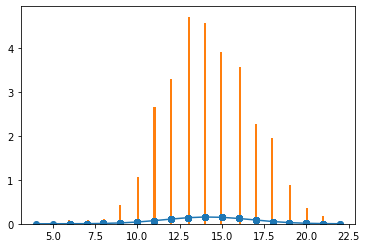

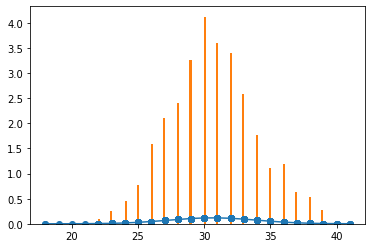

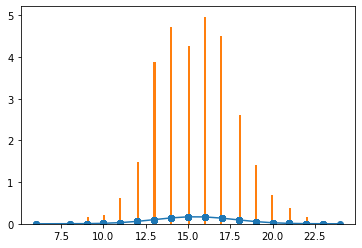

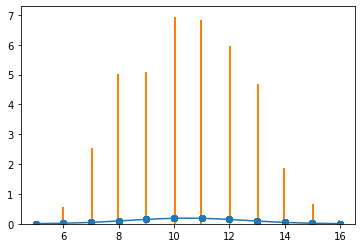

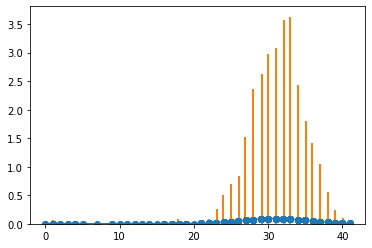

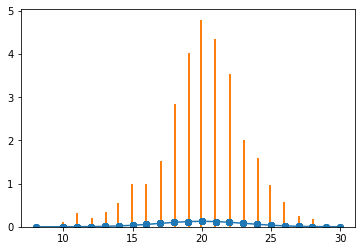

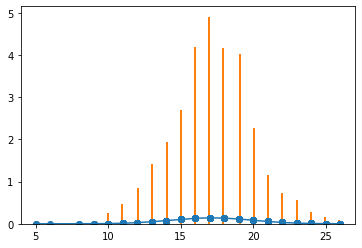

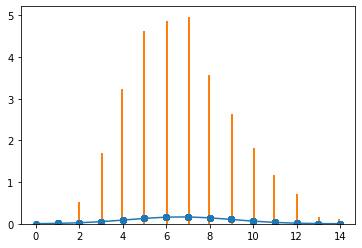

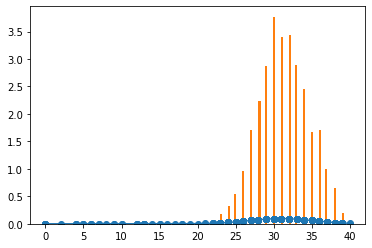

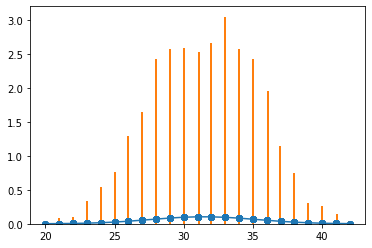

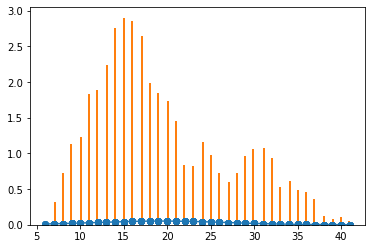

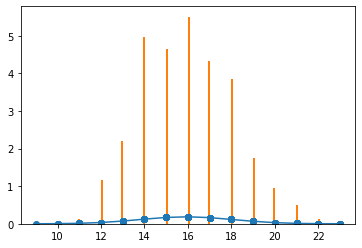

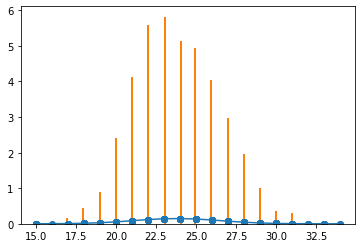

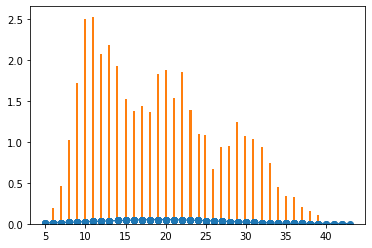

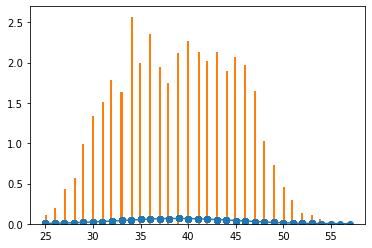

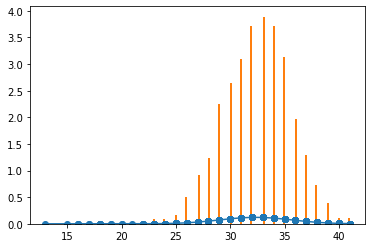

In [12]:
df_score=pd.DataFrame(columns=['path','conv_sc','classic_sc','real'])
an_imgs=random.sample(imgs,len(imgs))
for indx,imgss in enumerate(tqdm(an_imgs,total=len(an_imgs))):

    path=Path(imgss)
    parts=path.parts
    partscount=parts[-2]
    real_list_count=int(partscount.split('_')[0])
    try:
        v1=Veneer(str(path))
        res=v1.conv_an()
        bw=v1.filt_img()
        lineimg,lines=v1.edge_detector(bw,minLineLength=100,maxLineGap=20)
        ans,img,fe,figg=v1.count_veneer(lines,minLineLength=100,maxLineGap=20)
        df_score.loc[indx]=[str(path),int(res),int(ans),int(real_list_count)]
    except BaseException as e:
        print(str(path),' error ',e)
        df_score.loc[indx]=[str(path),np.NAN,np.NAN,int(real_list_count)]

In [16]:
df_score.to_csv(r'D:\Projects\CVVeneer\res\full_v1.csv')

In [18]:
print(df_score.isnull().sum(axis = 0))
df_nan0=df_score.dropna(axis=0)
ac_class=1-(np.abs(df_nan0.real-df_nan0.classic_sc))/df_nan0.real
df_nan0['ac_class']=ac_class
ac_conv=1-(np.abs(df_nan0.real-df_nan0.conv_sc))/df_nan0.real
df_nan0['ac_conv']=ac_conv

path            0
conv_sc       165
classic_sc    165
real            0
dtype: int64


d:\projects\cvveneer\venv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
d:\projects\cvveneer\venv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
df_nan0.head()

,path,conv_sc,classic_sc,real,ac_class,ac_conv
0,D:\Projects\CVVeneer\data\29_1\IMG_2129.jpeg,29,21,29,0.724138,1
1,D:\Projects\CVVeneer\data\15_2\IMG_2508.jpeg,17,7,15,0.466667,0.866667
2,D:\Projects\CVVeneer\data\29_1\IMG_2137.jpeg,27,20,29,0.689655,0.931034
4,D:\Projects\CVVeneer\data\25_2\IMG_2249.jpeg,25,17,25,0.68,1
5,D:\Projects\CVVeneer\data\9\IMG_2078.jpeg,9,6,9,0.666667,1


In [20]:
df_nan0.to_csv(r'D:\Projects\CVVeneer\res\ver1.csv')

In [21]:
print('Ac conv = ',df_nan0.ac_conv.mean(),' Ac class = ',df_nan0.ac_class.mean())

Ac conv =  0.8533563767320571  Ac class =  0.7146675673066185
